## 資料處理

In [1]:
import glob
from scipy.io import loadmat
import numpy as np

In [2]:
files = glob.glob("../cwru/*")
files.sort()
files

['../cwru/B007_1_123.mat',
 '../cwru/B014_1_190.mat',
 '../cwru/B021_1_227.mat',
 '../cwru/IR007_1_110.mat',
 '../cwru/IR014_1_175.mat',
 '../cwru/IR021_1_214.mat',
 '../cwru/Normal_1_098.mat',
 '../cwru/OR007_6_1_136.mat',
 '../cwru/OR014_6_1_202.mat',
 '../cwru/OR021_6_1_239.mat']

In [3]:
check_data = loadmat(files[0])
type(check_data)

dict

In [4]:
check_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X123_DE_time', 'X123_FE_time', 'X123RPM'])

In [5]:
drive_end_data = check_data["X123_DE_time"]
drive_end_data.shape

(487384, 1)

In [6]:
drive_end_data.shape[0]//48000

10

In [7]:
for file in files:
    check_data = loadmat(file)
    f_type = file.split("/")[-1].split("_")[0]
    f_id = file.split("_")[-1][:3]
    print(f_type, f_id, check_data.keys())

B007 123 dict_keys(['__header__', '__version__', '__globals__', 'X123_DE_time', 'X123_FE_time', 'X123RPM'])
B014 190 dict_keys(['__header__', '__version__', '__globals__', 'X190_DE_time', 'X190_FE_time', 'X190RPM'])
B021 227 dict_keys(['__header__', '__version__', '__globals__', 'X227_DE_time', 'X227_FE_time', 'X227RPM'])
IR007 110 dict_keys(['__header__', '__version__', '__globals__', 'X110_DE_time', 'X110_FE_time', 'X110RPM'])
IR014 175 dict_keys(['__header__', '__version__', '__globals__', 'X217', 'X217_DE_time', 'X175_DE_time', 'X175_FE_time', 'X175RPM'])
IR021 214 dict_keys(['__header__', '__version__', '__globals__', 'X214_DE_time', 'X214_FE_time', 'X214RPM'])
Normal 098 dict_keys(['__header__', '__version__', '__globals__', 'X098_DE_time', 'X098_FE_time'])
OR007 136 dict_keys(['__header__', '__version__', '__globals__', 'X136_DE_time', 'X136_FE_time', 'X136RPM'])
OR014 202 dict_keys(['__header__', '__version__', '__globals__', 'X202_DE_time', 'X202_FE_time', 'X202RPM'])
OR021 23

In [8]:
for file in files:
    check_data = loadmat(file)
    f_type = file.split("/")[-1].split("_")[0]
    f_id = file.split("_")[-1][:3]
    print(f_type, f_id, check_data[f'X{f_id}_DE_time'].shape)

B007 123 (487384, 1)
B014 190 (486224, 1)
B021 227 (486804, 1)
IR007 110 (486224, 1)
IR014 175 (381890, 1)
IR021 214 (485063, 1)
Normal 098 (483903, 1)
OR007 136 (486804, 1)
OR014 202 (484483, 1)
OR021 239 (489125, 1)


In [9]:
check_data_2 = loadmat(files[4])
check_data_2['X217_DE_time'].shape , check_data_2['X175_DE_time'].shape

((489125, 1), (381890, 1))

In [10]:
for file in files:
    check_data = loadmat(file)
    f_type = file.split("/")[-1].split("_")[0]
    if f_type == 'IR014':
        f_id = "217"
    else:
        f_id = file.split("_")[-1][:3]
    print(f_type, check_data[f'X{f_id}_DE_time'].shape)

B007 (487384, 1)
B014 (486224, 1)
B021 (486804, 1)
IR007 (486224, 1)
IR014 (489125, 1)
IR021 (485063, 1)
Normal (483903, 1)
OR007 (486804, 1)
OR014 (484483, 1)
OR021 (489125, 1)


In [11]:
for file in files:
    check_data = loadmat(file)
    f_type = file.split("/")[-1].split("_")[0]
    if f_type == 'IR014':
        f_id = "217"
    else:
        f_id = file.split("_")[-1][:3]
    print(f_type, check_data[f'X{f_id}_DE_time'].shape[0]//1024)

B007 475
B014 474
B021 475
IR007 474
IR014 477
IR021 473
Normal 472
OR007 475
OR014 473
OR021 477


In [12]:
import re

def replace_labels(label):
    if label.startswith("B"):
        return re.sub(r"B(\d+)", r"Ball_\1", label)
    elif label.startswith(("IR", "OR")):
        return re.sub(r"([A-Z]+)(\d+)", r"\1_\2", label)
    else:
        return label  # 如果是 Normal，保持不變

In [13]:
for file in files:
    check_data = loadmat(file)
    f_type = file.split("/")[-1].split("_")[0]
    if f_type == 'IR014':
        f_id = "217"
    else:
        f_id = file.split("_")[-1][:3]
    f_raw_data = check_data[f'X{f_id}_DE_time'][: 460 * 1024]
    print(replace_labels(f_type), f_raw_data.shape)

Ball_007 (471040, 1)
Ball_014 (471040, 1)
Ball_021 (471040, 1)
IR_007 (471040, 1)
IR_014 (471040, 1)
IR_021 (471040, 1)
Normal (471040, 1)
OR_007 (471040, 1)
OR_014 (471040, 1)
OR_021 (471040, 1)


In [14]:
# segment_size = 1024  # 每個片段的大小
# overlap_ratio = 0.1  # 設定 overlap 比例（0.5 表示 50% 重疊）
# step_size = int(segment_size * (1 - overlap_ratio))  # 計算移動步長

# X = []  # 儲存所有分割後的資料
# y = []  # 儲存對應的 labels

# for file in files:
#     check_data = loadmat(file)
#     f_type = file.split("/")[-1].split("_")[0]
#     if f_type == 'IR014':
#         f_id = "217"
#     else:
#         f_id = file.split("_")[-1][:3]
#     f_raw_data = check_data[f'X{f_id}_DE_time'][: 460 * 1024]
    
#     label = replace_labels(f_type)
#     data = f_raw_data
#     data = data.flatten()  # 轉成 1D 陣列，確保 slicing 正確
    
#     num_segments = (len(data) - segment_size) // step_size + 1  # 計算可以切幾段
    
#     segments = [data[i : i + segment_size] for i in range(0, num_segments * step_size, step_size)]
#     X.extend(segments)  # 加入特徵
#     y.extend([label] * len(segments))  # 加入對應的標籤

# # 將所有資料合併成 NumPy 陣列
# X = np.vstack(X)  # 合併所有 data，變成 (N, 1024)
# y = np.array(y)   # 轉成 NumPy 陣列，對應 labels

# print(f"X shape: {X.shape}")  # 確保 shape 為 (總片段數, 1024)
# print(f"y shape: {y.shape}")  # 確保 shape 為 (總片段數,)
# print(f"y example: {y[:10]}")  # 看看前幾個 label

### 切割資料

In [31]:
for segment_size in [1024,2048,4096]:
    for i in [0,2,4]:
        overlap_ratio = 0.1 * i  # 設定 overlap 比例（0.5 表示 50% 重疊）
        step_size = int(segment_size * (1 - overlap_ratio))  # 計算移動步長

        X = []  # 儲存所有分割後的資料
        y = []  # 儲存對應的 labels

        for file in files:
            check_data = loadmat(file)
            f_type = file.split("/")[-1].split("_")[0]
            if f_type == 'IR014':
                f_id = "217"
            else:
                f_id = file.split("_")[-1][:3]
            f_raw_data = check_data[f'X{f_id}_DE_time'][: 460 * 1024]
            
            label = replace_labels(f_type)
            data = f_raw_data
            data = data.flatten()  # 轉成 1D 陣列，確保 slicing 正確
            
            num_segments = (len(data) - segment_size) // step_size + 1  # 計算可以切幾段
            
            segments = [data[i : i + segment_size] for i in range(0, num_segments * step_size, step_size)]
            X.extend(segments)  # 加入特徵
            y.extend([label] * len(segments))  # 加入對應的標籤

        # 將所有資料合併成 NumPy 陣列
        X = np.vstack(X)  # 合併所有 data，變成 (N, 1024)
        y = np.array(y)   # 轉成 NumPy 陣列，對應 labels
        print(f"X shape: {X.shape}")  # 確保 shape 為 (總片段數, 1024)
        print(f"y shape: {y.shape}")  # 確保 shape 為 (總片段數,)
        np.savez(f'datas/48k_DE_load1_segment{segment_size}_overlap{i}.npz', datas=X, labels=y)

X shape: (4600, 1024)
y shape: (4600,)
X shape: (5740, 1024)
y shape: (5740,)
X shape: (7660, 1024)
y shape: (7660,)
X shape: (2300, 2048)
y shape: (2300,)
X shape: (2870, 2048)
y shape: (2870,)
X shape: (3820, 2048)
y shape: (3820,)
X shape: (1150, 4096)
y shape: (1150,)
X shape: (1430, 4096)
y shape: (1430,)
X shape: (1910, 4096)
y shape: (1910,)


In [16]:
1024 * 4 * 4 / 48000

0.3413333333333333

In [18]:
for segment_size in [1024 * 4 * 4]:
    for i in [3,5]:
        overlap_ratio = 0.1 * i  # 設定 overlap 比例（0.5 表示 50% 重疊）
        step_size = int(segment_size * (1 - overlap_ratio))  # 計算移動步長

        X = []  # 儲存所有分割後的資料
        y = []  # 儲存對應的 labels

        for file in files:
            check_data = loadmat(file)
            f_type = file.split("/")[-1].split("_")[0]
            if f_type == 'IR014':
                f_id = "217"
            else:
                f_id = file.split("_")[-1][:3]
            f_raw_data = check_data[f'X{f_id}_DE_time'][: 460 * 1024]
            
            label = replace_labels(f_type)
            data = f_raw_data
            data = data.flatten()  # 轉成 1D 陣列，確保 slicing 正確
            
            num_segments = (len(data) - segment_size) // step_size + 1  # 計算可以切幾段
            
            segments = [data[i : i + segment_size] for i in range(0, num_segments * step_size, step_size)]
            X.extend(segments)  # 加入特徵
            y.extend([label] * len(segments))  # 加入對應的標籤

        # 將所有資料合併成 NumPy 陣列
        X = np.vstack(X)  # 合併所有 data，變成 (N, 1024)
        y = np.array(y)   # 轉成 NumPy 陣列，對應 labels
        print(f"X shape: {X.shape}")  # 確保 shape 為 (總片段數, 1024)
        print(f"y shape: {y.shape}")  # 確保 shape 為 (總片段數,)
        np.savez(f'datas/48k_DE_load1_segment{segment_size}_overlap{i}.npz', datas=X, labels=y)

X shape: (400, 16384)
y shape: (400,)
X shape: (560, 16384)
y shape: (560,)


In [16]:
_ = np.load(f'datas/48k_DE_load1_segment1024_overlap1.npz')
_.keys()

KeysView(NpzFile 'datas/48k_DE_load1_segment1024_overlap1.npz' with keys: datas, labels)

In [17]:
_ = np.load(f'datas/48k_DE_load1_segment1024_overlap1.npz')
_['datas'], _['labels']

(array([[-0.04109723, -0.046104  , -0.02837169, ...,  0.13601723,
          0.10138708,  0.06654831],
        [ 0.09700615,  0.17544554,  0.22697354, ..., -0.09825785,
         -0.1356    , -0.13664308],
        [ 0.02670277, -0.00521538, -0.04401785, ...,  0.        ,
         -0.00521538, -0.00458954],
        ...,
        [ 0.02337067, -0.010016  , -0.047576  , ...,  0.03422133,
         -0.00584267, -0.03589067],
        [ 0.01585867, -0.05842667, -0.15942133, ...,  0.092648  ,
          0.13354667,  0.15608267],
        [-0.06844267, -0.13772   , -0.17361067, ...,  0.190304  ,
          0.207832  ,  0.06343467]]),
 array(['Ball_007', 'Ball_007', 'Ball_007', ..., 'OR_021', 'OR_021',
        'OR_021'], dtype='<U8'))

## Plotly 視覺化 data

### 弄成 32x32

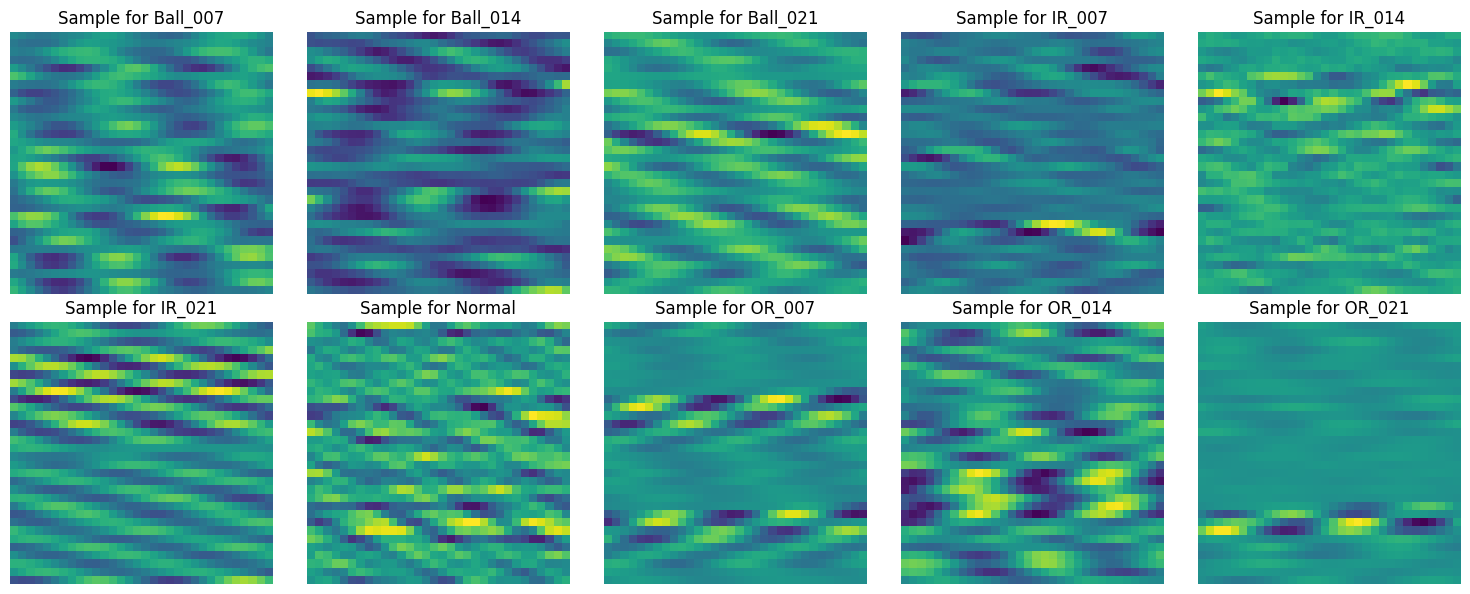

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment1024_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 取得所有 unique 的 label
unique_labels = np.unique(labels)

# 創建一個字典來存儲每個類別的隨機樣本
samples = {}

# 對每個 unique label 選擇一個隨機樣本
for label in unique_labels:
    # 找到這個 label 的索引
    indices = np.where(labels == label)[0]
    # 隨機選擇一個索引
    random_index = np.random.choice(indices)
    # 取得該索引對應的數據
    samples[label] = datas[random_index].reshape(32,32)

# 設定子圖大小（假設最多 10 個類別）
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6))

# 如果唯一標籤數少於 10，補充空白子圖
axes = axes.flatten()

# 繪製每個類別的隨機樣本
for i, label in enumerate(unique_labels):
    ax = axes[i]
    ax.imshow(samples[label], cmap='viridis')
    ax.set_title(f"Sample for {label}")
    ax.axis('off')

# 隱藏多餘的子圖
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

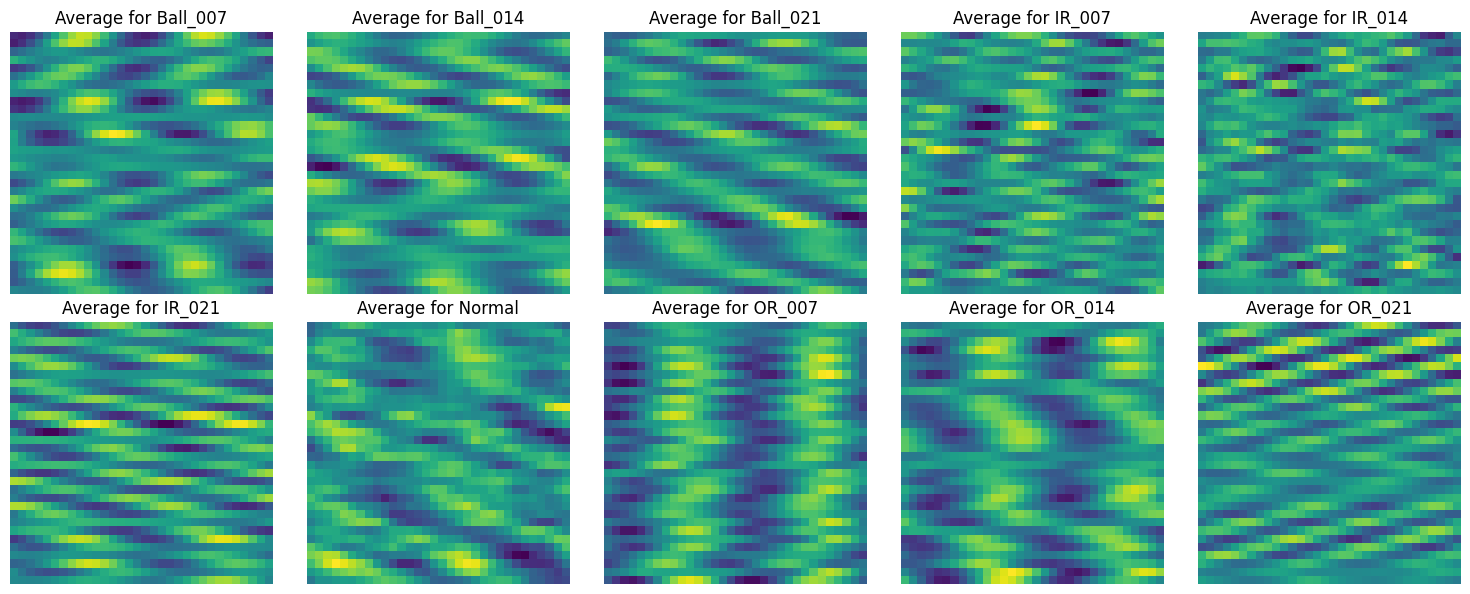

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment1024_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 取得所有 unique 的 label
unique_labels = np.unique(labels)

# 創建一個字典來存儲每個類別的平均資料
averages = {}

# 對每個 unique label 計算平均
for label in unique_labels:
    # 找到這個 label 的索引
    indices = np.where(labels == label)[0]
    # 根據這些索引從 data 中選出相對應的資料
    class_data = datas[indices]
    # 計算每個類別的平均
    averages[label] = np.mean(class_data, axis=0).reshape(32,32)

# 計算需要的子圖大小，這裡設為 2x5，並確保有足夠的子圖
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6))

# 如果唯一標籤數少於 10，補充空白子圖
axes = axes.flatten()

# 繪製每個類別的平均圖
for i, label in enumerate(unique_labels):
    ax = axes[i]
    ax.imshow(averages[label], cmap='viridis')
    ax.set_title(f"Average for {label}")
    ax.axis('off')

# 如果子圖多餘的話，隱藏它們
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

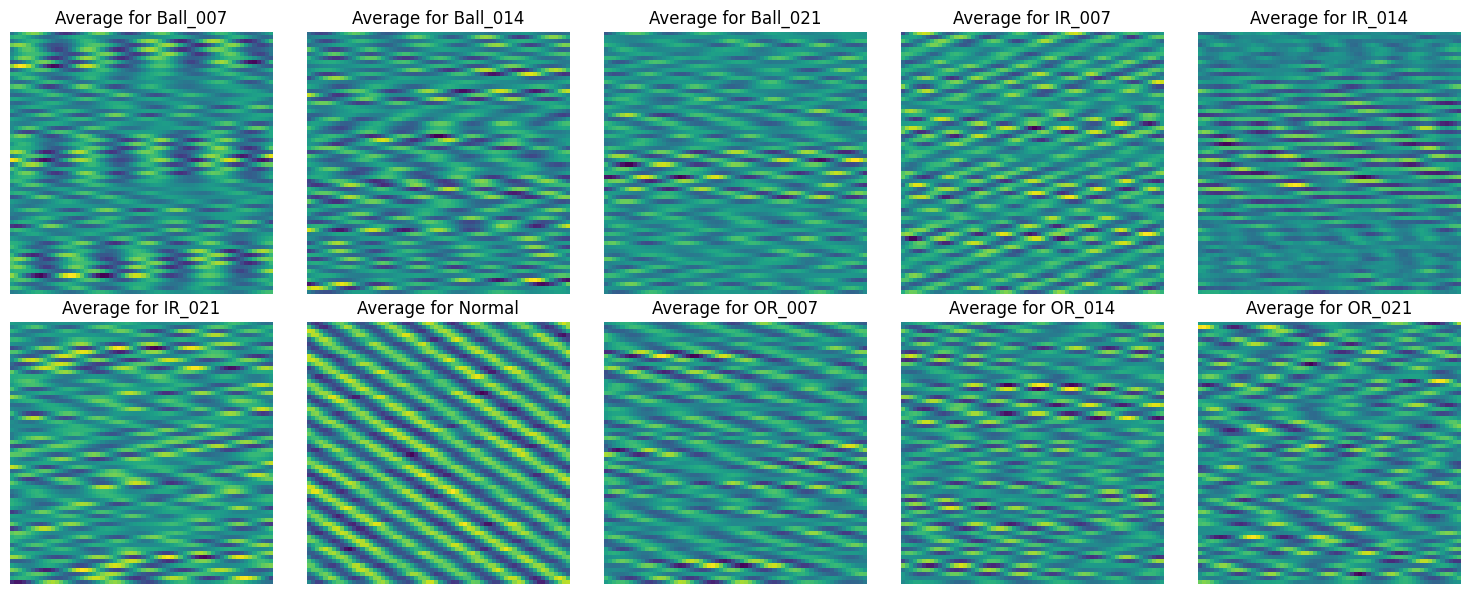

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap2.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 取得所有 unique 的 label
unique_labels = np.unique(labels)

# 創建一個字典來存儲每個類別的平均資料
averages = {}

# 對每個 unique label 計算平均
for label in unique_labels:
    # 找到這個 label 的索引
    indices = np.where(labels == label)[0]
    # 根據這些索引從 data 中選出相對應的資料
    class_data = datas[indices]
    # 計算每個類別的平均
    averages[label] = np.mean(class_data, axis=0).reshape(64,64)

# 計算需要的子圖大小，這裡設為 2x5，並確保有足夠的子圖
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6))

# 如果唯一標籤數少於 10，補充空白子圖
axes = axes.flatten()

# 繪製每個類別的平均圖
for i, label in enumerate(unique_labels):
    ax = axes[i]
    ax.imshow(averages[label], cmap='viridis')
    ax.set_title(f"Average for {label}")
    ax.axis('off')

# 如果子圖多餘的話，隱藏它們
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

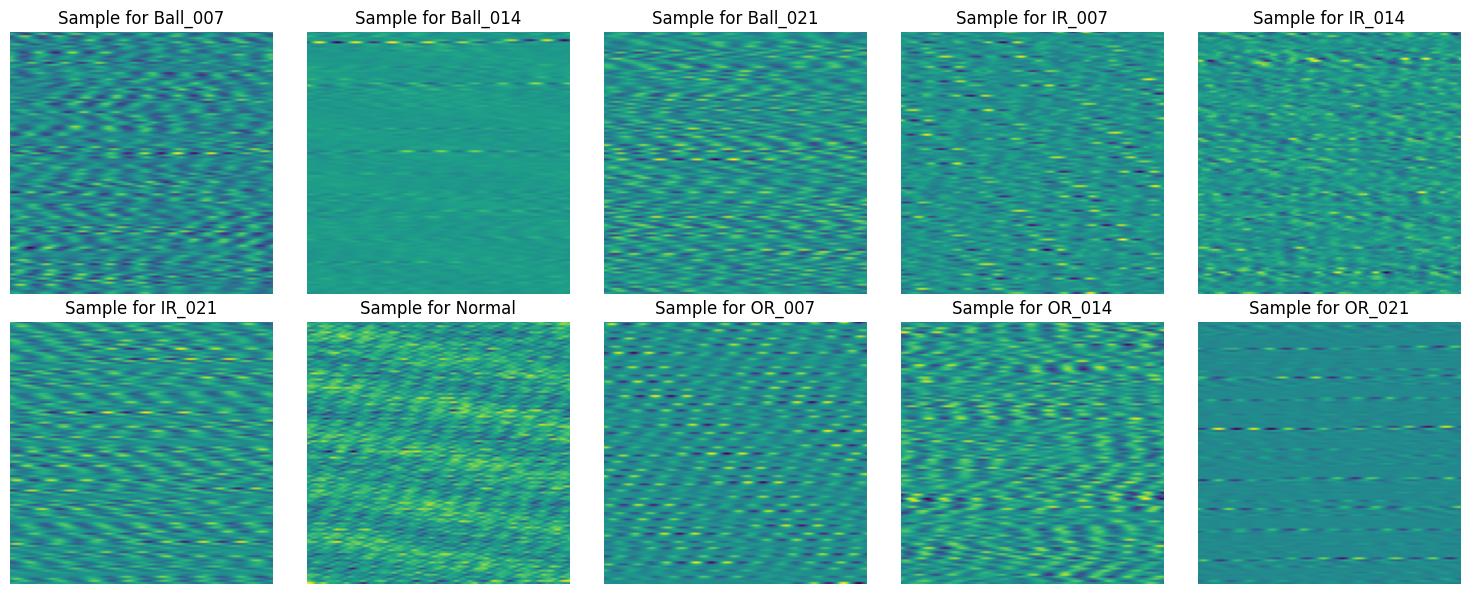

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment16384_overlap5.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 取得所有 unique 的 label
unique_labels = np.unique(labels)

# 創建一個字典來存儲每個類別的隨機樣本
samples = {}

# 對每個 unique label 選擇一個隨機樣本
for label in unique_labels:
    # 找到這個 label 的索引
    indices = np.where(labels == label)[0]
    # 隨機選擇一個索引
    random_index = np.random.choice(indices)
    # 取得該索引對應的數據
    samples[label] = datas[random_index].reshape(128,128)

# 設定子圖大小（假設最多 10 個類別）
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6))

# 如果唯一標籤數少於 10，補充空白子圖
axes = axes.flatten()

# 繪製每個類別的隨機樣本
for i, label in enumerate(unique_labels):
    ax = axes[i]
    ax.imshow(samples[label], cmap='viridis')
    ax.set_title(f"Sample for {label}")
    ax.axis('off')

# 隱藏多餘的子圖
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

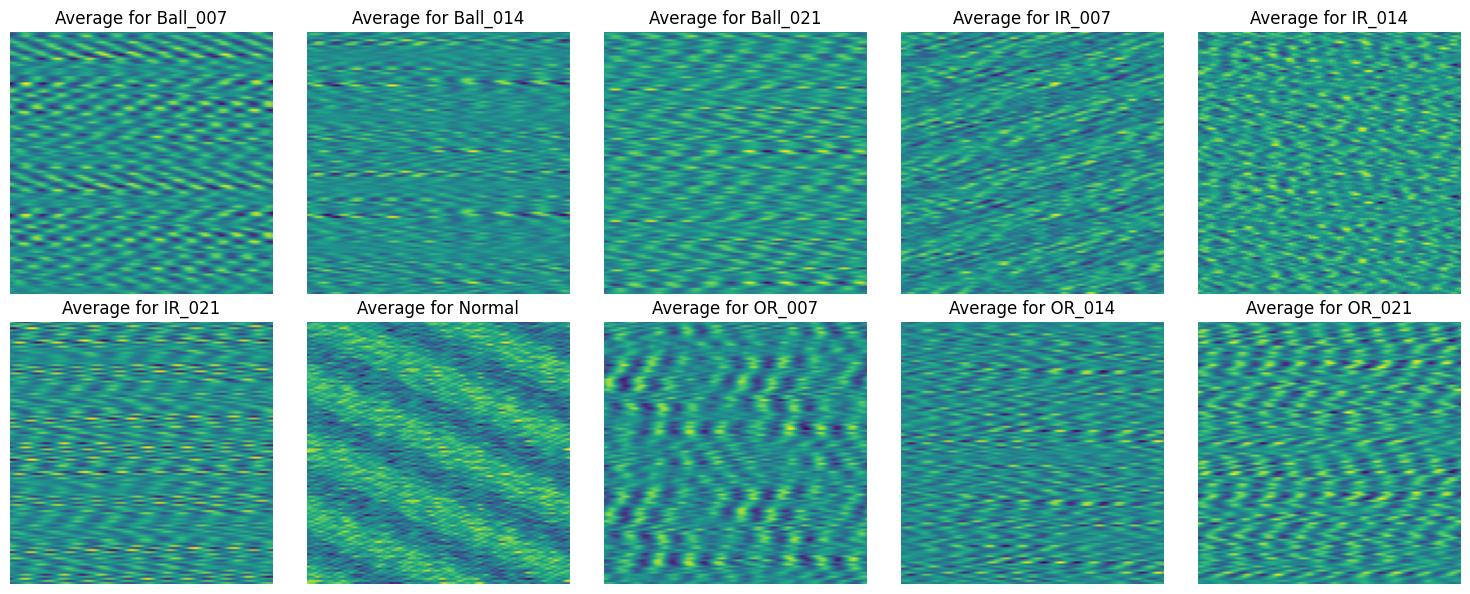

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment16384_overlap5.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 取得所有 unique 的 label
unique_labels = np.unique(labels)

# 創建一個字典來存儲每個類別的平均資料
averages = {}

# 對每個 unique label 計算平均
for label in unique_labels:
    # 找到這個 label 的索引
    indices = np.where(labels == label)[0]
    # 根據這些索引從 data 中選出相對應的資料
    class_data = datas[indices]
    # 計算每個類別的平均
    averages[label] = np.mean(class_data, axis=0).reshape(128,128)

# 計算需要的子圖大小，這裡設為 2x5，並確保有足夠的子圖
nrows, ncols = 2, 5
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6))

# 如果唯一標籤數少於 10，補充空白子圖
axes = axes.flatten()

# 繪製每個類別的平均圖
for i, label in enumerate(unique_labels):
    ax = axes[i]
    ax.imshow(averages[label], cmap='viridis')
    ax.set_title(f"Average for {label}")
    ax.axis('off')

# 如果子圖多餘的話，隱藏它們
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

### PCA and t-SNE

In [20]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment1024_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 重塑資料為 2D 陣列
data_reshaped = datas.reshape(datas.shape[0], -1)

# 使用 LabelEncoder 將 labels 轉換為數字
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_str = label_encoder.inverse_transform(labels_encoded)  # 轉回原始標籤

# 使用 PCA 進行降維
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_reshaped)

# 將結果存入 DataFrame
data_dict = {
    "Principal Component 1": data_pca[:, 0],
    "Principal Component 2": data_pca[:, 1],
    "Label": labels_str
}

# 指定要 **初始顯示** 的 Label（這裡選擇第一個類別）
initial_label = 'Normal'
# labels_str[3]

# 使用 plotly.express 建立互動式散點圖
fig = px.scatter(
    data_dict,
    x="Principal Component 1",
    y="Principal Component 2",
    color="Label",
    title="PCA visualization of the data",
    opacity=0.7
)

# 隱藏所有 trace，僅顯示 `initial_label`
for trace in fig.data:
    if trace.name != initial_label:
        trace.visible = "legendonly"  # 初始隱藏，點擊圖例後顯示

# 顯示圖表
fig.show()

In [21]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment1024_overlap0.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 重塑資料為 2D 陣列，(4600, 1024)
data_reshaped = datas.reshape(datas.shape[0], -1)

# 使用 LabelEncoder 將 labels 轉換為數字
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_str = label_encoder.inverse_transform(labels_encoded)  # 轉回原始標籤

# 使用 t-SNE 進行降維，將資料降至 2 維
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data_reshaped)

# 將結果存入 DataFrame
data_dict = {
    "t-SNE Component 1": data_tsne[:, 0],
    "t-SNE Component 2": data_tsne[:, 1],
    "Label": labels_str
}

# 使用 plotly.express 建立互動式散點圖
fig = px.scatter(
    data_dict,
    x="t-SNE Component 1", 
    y="t-SNE Component 2", 
    color="Label",
    title="t-SNE visualization of the data",
    opacity=0.6
)

# 指定要 **初始顯示** 的 Label（這裡選擇第一個類別）
initial_label = 'Normal'
# 隱藏所有 trace，僅顯示 `initial_label`
for trace in fig.data:
    if trace.name != initial_label:
        trace.visible = "legendonly"  # 初始隱藏，點擊圖例後顯示

# 顯示圖表
fig.show()

In [19]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap2.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 重塑資料為 2D 陣列
data_reshaped = datas.reshape(datas.shape[0], -1)

# 使用 LabelEncoder 將 labels 轉換為數字
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_str = label_encoder.inverse_transform(labels_encoded)  # 轉回原始標籤

# 使用 PCA 進行降維
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_reshaped)

# 將結果存入 DataFrame
data_dict = {
    "Principal Component 1": data_pca[:, 0],
    "Principal Component 2": data_pca[:, 1],
    "Label": labels_str
}

# 指定要 **初始顯示** 的 Label（這裡選擇第一個類別）
initial_label = 'Normal'
# labels_str[3]

# 使用 plotly.express 建立互動式散點圖
fig = px.scatter(
    data_dict,
    x="Principal Component 1",
    y="Principal Component 2",
    color="Label",
    title="PCA visualization of the data",
    opacity=0.7
)

# 隱藏所有 trace，僅顯示 `initial_label`
for trace in fig.data:
    if trace.name != initial_label:
        trace.visible = "legendonly"  # 初始隱藏，點擊圖例後顯示

# 顯示圖表
fig.show()

In [25]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment16384_overlap5.npz")
datas = read_online_data['datas']
labels = read_online_data['labels']

# 重塑資料為 2D 陣列
data_reshaped = datas.reshape(datas.shape[0], -1)

# 使用 LabelEncoder 將 labels 轉換為數字
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_str = label_encoder.inverse_transform(labels_encoded)  # 轉回原始標籤

# 使用 PCA 進行降維
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_reshaped)

# 將結果存入 DataFrame
data_dict = {
    "Principal Component 1": data_pca[:, 0],
    "Principal Component 2": data_pca[:, 1],
    "Label": labels_str
}

# 指定要 **初始顯示** 的 Label（這裡選擇第一個類別）
initial_label = 'Normal'
# labels_str[3]

# 使用 plotly.express 建立互動式散點圖
fig = px.scatter(
    data_dict,
    x="Principal Component 1",
    y="Principal Component 2",
    color="Label",
    title="PCA visualization of the data",
    opacity=0.7
)

# 隱藏所有 trace，僅顯示 `initial_label`
for trace in fig.data:
    if trace.name != initial_label:
        trace.visible = "legendonly"  # 初始隱藏，點擊圖例後顯示

# 顯示圖表
fig.show()

## Time Domain Feature `48k_DE_load1_segment1024_overlap0`

In [22]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment1024_overlap0.npz")
datas = read_online_data['datas']
# datas = datas.reshape(2300,2048)
labels = read_online_data['labels']

# 基本統計量
max_vals = np.max(datas, axis=1)
min_vals = np.min(datas, axis=1)
mean_vals = np.mean(datas, axis=1)
std_vals = np.std(datas, axis=1)
rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))

# 偏度與峰度
skewness_vals = skew(datas, axis=1)
kurt_vals = kurtosis(datas, axis=1)
# def compute_skewness(x):
#     """x should be 1D np array."""
#     N = len(x)
#     third_moment = np.sum((x - np.mean(x))**3) / N
#     s_3 = np.std(x, ddof = 1) ** 3
#     return third_moment/s_3
# def compute_kurtosis(x):
#     """x should be 1D np array."""
#     N = len(x)
#     fourth_moment = np.sum((x - np.mean(x))**4) / N
#     s_4 = np.std(x, ddof = 1) ** 4
#     return fourth_moment / s_4 - 3
# skewness_vals = [compute_skewness(data) for data in datas]
# kurt_vals = [compute_kurtosis(data) for data in datas]

# 波峰因子 (Crest Factor)
def crest_factor(datas):
    peak_vals = np.max(datas, axis=1)  # 計算每行的最大值
    rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))  # 計算每行的 RMS
    return peak_vals / rms_vals  # 最大值 / RMS

# 形狀因子 (Form Factor)
def form_factor(datas):
    rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))  # 計算每行的 RMS
    mean_vals = np.mean(datas, axis=1)  # 計算每行的均值
    return rms_vals / mean_vals  # RMS / 均值

crest_vals = crest_factor(datas)
form_vals = form_factor(datas)

# 創建 DataFrame
feature_names = ['max', 'min', 'mean', 'std', 'rms', 'skewness', 'kurtosis', 'crest', 'form', 'fault']
features = np.vstack([
    max_vals,
    min_vals,
    mean_vals,
    std_vals,
    rms_vals,
    skewness_vals,
    kurt_vals,
    crest_vals,
    form_vals,
    labels
    # labels[::2]
]).T  # Transpose to match columns with feature names

df = pd.DataFrame(features, columns=feature_names)

# 顯示 DataFrame
df

max                   min                  mean  \
0     0.35986153846153845  -0.32606584615384615   0.01903676502403846   
1      0.3339932307692307   -0.4188996923076923   0.01664400360576923   
2     0.41076369230769233   -0.3611132307692308   0.02322822295673077   
3     0.46771569230769233  -0.33670523076923076   0.02128141766826923   
4      0.4685501538461538  -0.43809230769230767  0.019682576322115383   
...                   ...                   ...                   ...   
4595    5.047229333333333    -5.287613333333333  0.013139479166666666   
4596   2.1751413333333334             -2.231064  0.019152502604166666   
4597    4.227586666666666    -3.968005333333333  0.007631005208333333   
4598   2.6851226666666665              -3.11748  0.012758825520833334   
4599   1.0174586666666665   -0.9965919999999999   0.01342884114583333   

                      std                  rms              skewness  \
0      0.1216143454980048  0.12309527794959697  -0.03513870759458802   
1     0.12379710119095386  0.12491094875675282  -0.19683162047768063   
2     0.12764388334759555   0.1297401684050941   0.08770307591675011   
3     0.13709159897617137  0.13873357649759743   0.24740685196143816   
4     0.15844039354911918   0.1596582666781638  0.006549403283710894   
...                   ...                  ...                   ...   
4595   0.9008407430017533   0.9009365627860388    -0.564222758363217   
4596  0.38826592883960975   0.3887380221353289  0.060120120071343694   
4597   0.8007449700519922   0.8007813305166744   0.17292649336262395   
4598   0.5736670334179438   0.5738088992506262   -0.7318907395315423   
4599  0.25023737046813443    0.250597436845085    0.1340444012461518   

                  kurtosis               crest                form     fault  
0      -0.1680500072556277   2.923439017773603   6.466186759891179  Ball_007  
1      0.07240463063067448   2.673850724003685   7.504861913960145  Ball_007  
2      -0.4049932479339482   3.166048706096517   5.585453895753126  Ball_007  
3      0.14565931780805919   3.371322963881005   6.519000691596329  Ball_007  
4     -0.40195840731909405   2.934706505305163   8.111654900520895  Ball_007  
...                    ...                 ...                 ...       ...  
4595    11.350306729541005    5.60220279852488   68.56714420398112    OR_021  
4596     9.664152655370206  5.5953912647528865  20.296983123801173    OR_021  
4597     6.888264427066616   5.279327209013443   104.9378566328578    OR_021  
4598     9.255297321138892   4.679471981304822   44.97348900286146    OR_021  
4599     2.948930044658467   4.060131976911008  18.661136439374726    OR_021  

[4600 rows x 10 columns]

In [23]:
# 顯示所有欄位的資料型別
df.dtypes

max         object
min         object
mean        object
std         object
rms         object
skewness    object
kurtosis    object
crest       object
form        object
fault       object
dtype: object

In [26]:
# 強制轉換，無法轉換的值將被設為 NaN
df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric, errors='coerce')

# 檢查資料型別
print(df.dtypes)

max         float64
min         float64
mean        float64
std         float64
rms         float64
skewness    float64
kurtosis    float64
crest       float64
form        float64
fault        object
dtype: object


In [27]:
df

max       min      mean       std       rms  skewness   kurtosis  \
0     0.359862 -0.326066  0.019037  0.121614  0.123095 -0.035139  -0.168050   
1     0.333993 -0.418900  0.016644  0.123797  0.124911 -0.196832   0.072405   
2     0.410764 -0.361113  0.023228  0.127644  0.129740  0.087703  -0.404993   
3     0.467716 -0.336705  0.021281  0.137092  0.138734  0.247407   0.145659   
4     0.468550 -0.438092  0.019683  0.158440  0.159658  0.006549  -0.401958   
...        ...       ...       ...       ...       ...       ...        ...   
4595  5.047229 -5.287613  0.013139  0.900841  0.900937 -0.564223  11.350307   
4596  2.175141 -2.231064  0.019153  0.388266  0.388738  0.060120   9.664153   
4597  4.227587 -3.968005  0.007631  0.800745  0.800781  0.172926   6.888264   
4598  2.685123 -3.117480  0.012759  0.573667  0.573809 -0.731891   9.255297   
4599  1.017459 -0.996592  0.013429  0.250237  0.250597  0.134044   2.948930   

         crest        form     fault  
0     2.923439    6.466187  Ball_007  
1     2.673851    7.504862  Ball_007  
2     3.166049    5.585454  Ball_007  
3     3.371323    6.519001  Ball_007  
4     2.934707    8.111655  Ball_007  
...        ...         ...       ...  
4595  5.602203   68.567144    OR_021  
4596  5.595391   20.296983    OR_021  
4597  5.279327  104.937857    OR_021  
4598  4.679472   44.973489    OR_021  
4599  4.060132   18.661136    OR_021  

[4600 rows x 10 columns]

In [28]:
df.to_pickle("datas/48k_DE_load1_segment1024_overlap0_TDFeature.pkl")

In [29]:
import pandas as pd
df = pd.read_pickle('datas/48k_DE_load1_segment1024_overlap0_TDFeature.pkl')

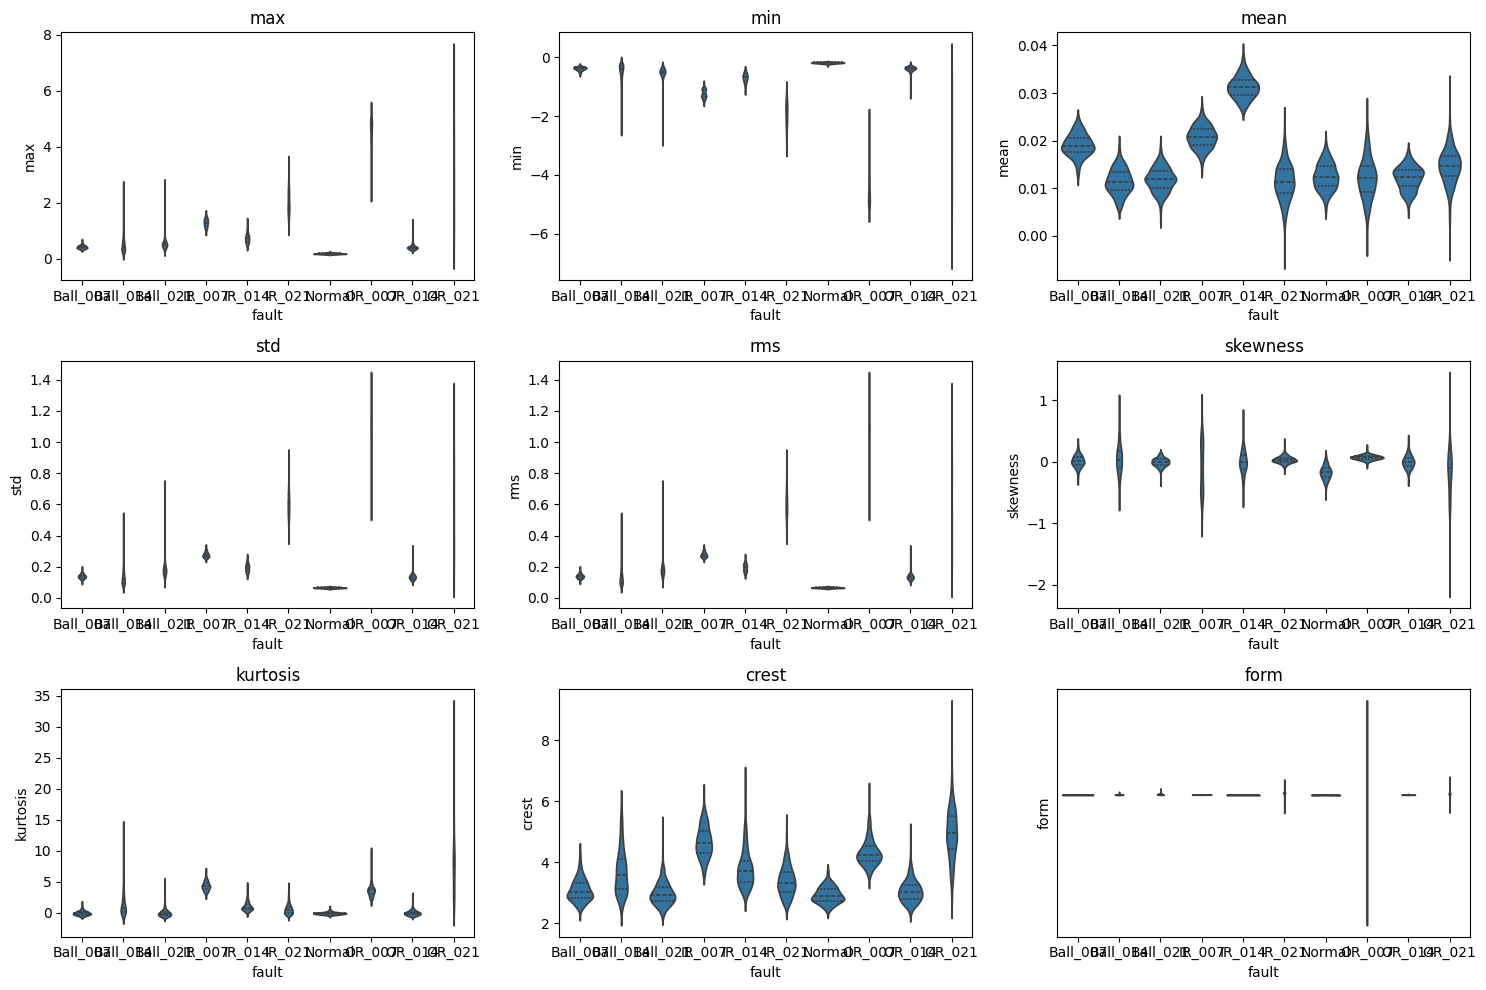

In [31]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    sns.violinplot(x=df1["fault"], y=df1[col], inner="quartile")
    # sns.violinplot(data= df, x="fault", y=f"{col}")
    plt.title(col)

plt.yticks([])
plt.tight_layout()
plt.show()

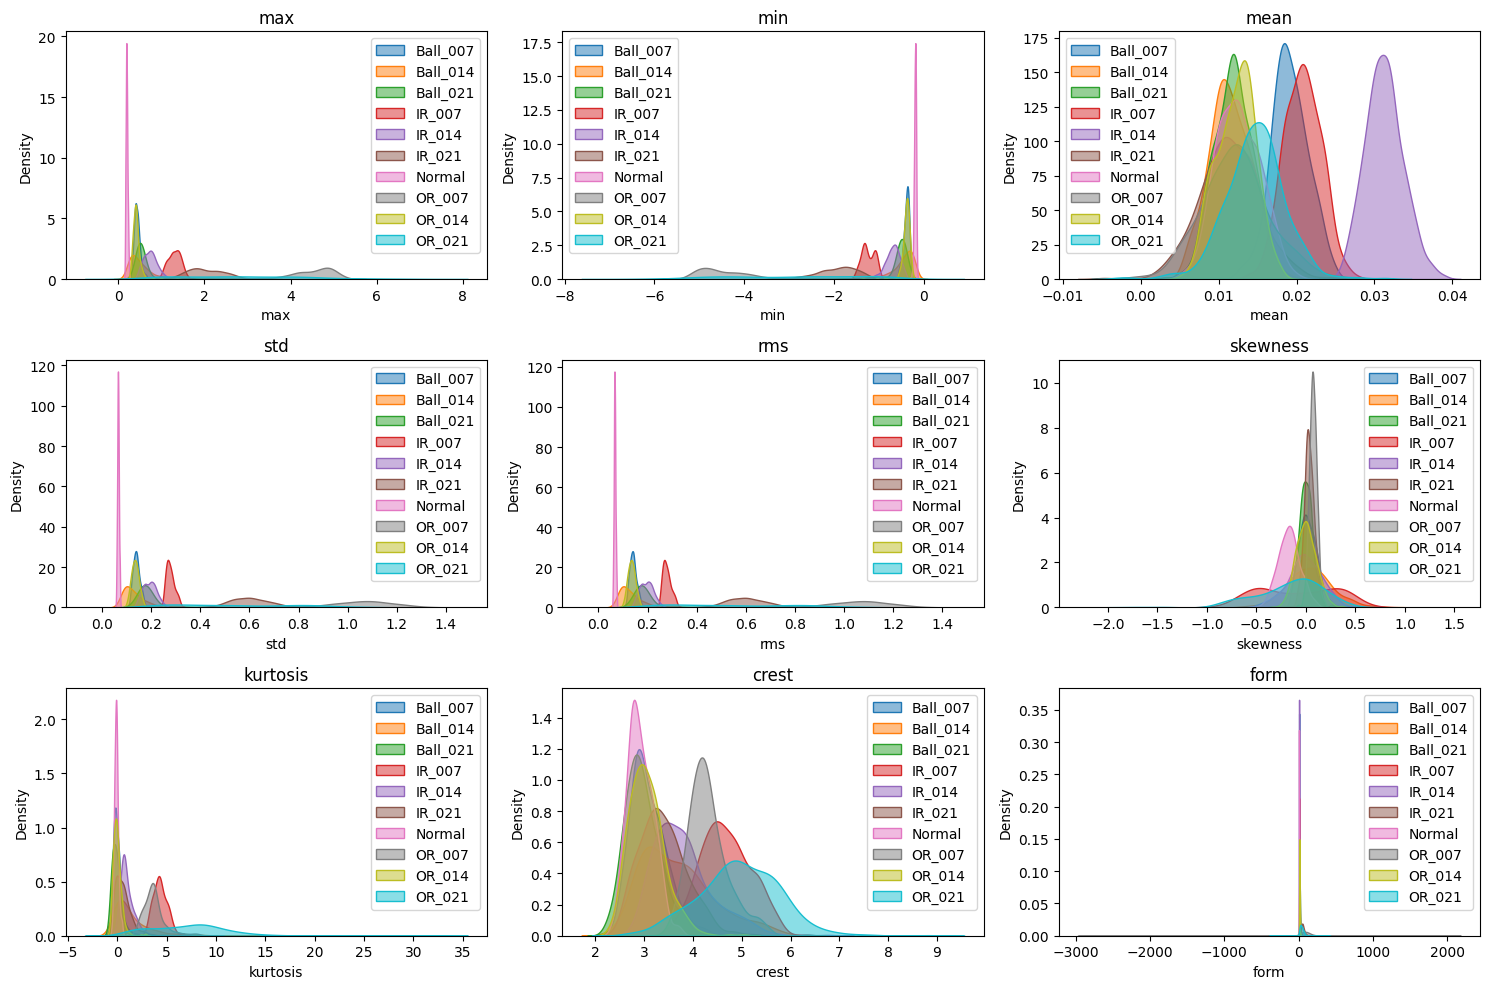

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    
    for fault_label in df1["fault"].unique():
        subset = df1[df1["fault"] == fault_label]
        sns.kdeplot(subset[col], label=f"{fault_label}", fill=True, alpha=0.5)
    
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

In [37]:
df[['form']].min(), df[['form']].max()

(form   -2818.352752
 dtype: float64,
 form    2027.845467
 dtype: float64)

In [35]:
df[df['fault']=='Normal']

max       min      mean       std       rms  skewness  kurtosis  \
2760  0.184416 -0.198810  0.005364  0.065107  0.065328 -0.373705 -0.082419   
2761  0.204234 -0.171065  0.010640  0.067653  0.068484 -0.202203 -0.293267   
2762  0.204443 -0.197350  0.009911  0.062318  0.063101 -0.257880  0.154834   
2763  0.179201 -0.182330  0.009280  0.063649  0.064322 -0.285277 -0.176574   
2764  0.204860 -0.180244  0.010609  0.063624  0.064503 -0.115693 -0.214526   
...        ...       ...       ...       ...       ...       ...       ...   
3215  0.207990 -0.186919  0.014878  0.068220  0.069823 -0.154803 -0.034088   
3216  0.195055 -0.181495  0.012885  0.065246  0.066506 -0.312642 -0.009628   
3217  0.214248 -0.224053  0.012330  0.068312  0.069416 -0.338361  0.044065   
3218  0.196098 -0.247209  0.012699  0.064864  0.066096 -0.411974  0.509576   
3219  0.188171 -0.198393  0.011719  0.061543  0.062649 -0.283746 -0.129675   

         crest       form   fault  
2760  2.822927  12.178721  Normal  
2761  2.982204   6.436630  Normal  
2762  3.239937   6.366454  Normal  
2763  2.786007   6.931122  Normal  
2764  3.176002   6.079737  Normal  
...        ...        ...     ...  
3215  2.978801   4.692954  Normal  
3216  2.932901   5.161398  Normal  
3217  3.086434   5.629799  Normal  
3218  2.966888   5.204855  Normal  
3219  3.003571   5.345791  Normal  

[460 rows x 10 columns]

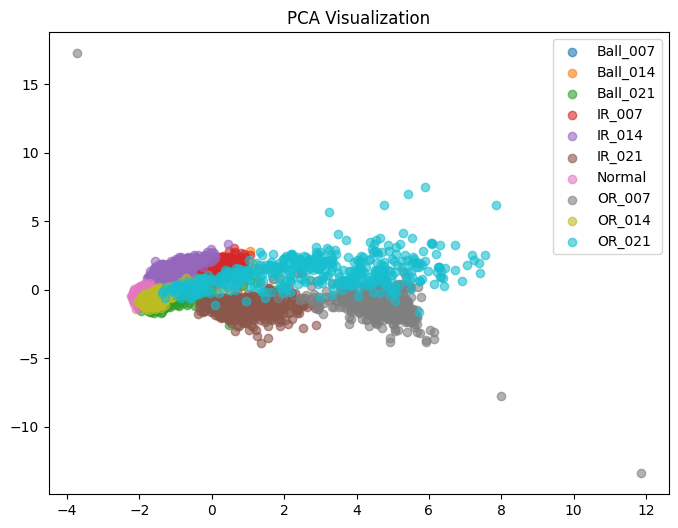

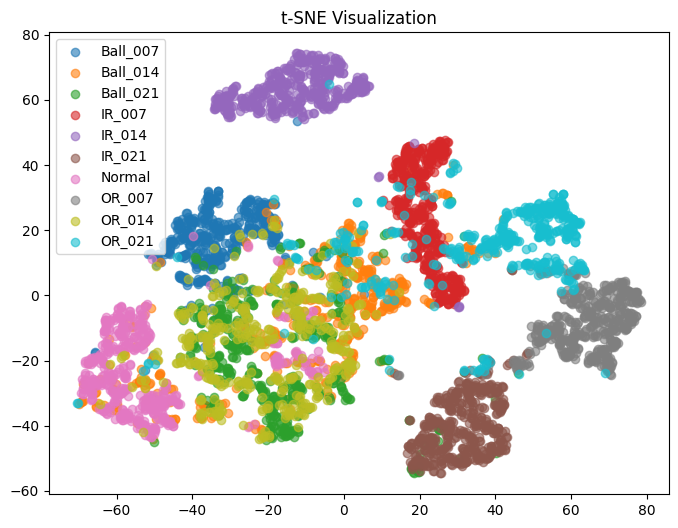

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
datas = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(datas)

# PCA 降維到 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 2D
tsne = TSNE(n_components=2, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 畫圖函數
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        idx = labels == label
        plt.scatter(embedding[idx, 0], embedding[idx, 1], label=label, alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.show()

# 視覺化 PCA
plot_embedding(pca_result, labels.values, "PCA Visualization")

# 視覺化 t-SNE
plot_embedding(tsne_result, labels.values, "t-SNE Visualization")

In [39]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
datas = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(datas)

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels.values, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels.values, "t-SNE 3D Visualization")

## Time Domain Feature `48k_DE_load1_segment2048_overlap0`

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment2048_overlap0.npz")
datas = read_online_data['datas']
# datas = datas.reshape(2300,2048)
labels = read_online_data['labels']

# 基本統計量
max_vals = np.max(datas, axis=1)
min_vals = np.min(datas, axis=1)
mean_vals = np.mean(datas, axis=1)
std_vals = np.std(datas, axis=1)
rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))

# 偏度與峰度
skewness_vals = skew(datas, axis=1)
kurt_vals = kurtosis(datas, axis=1)
# def compute_skewness(x):
#     """x should be 1D np array."""
#     N = len(x)
#     third_moment = np.sum((x - np.mean(x))**3) / N
#     s_3 = np.std(x, ddof = 1) ** 3
#     return third_moment/s_3
# def compute_kurtosis(x):
#     """x should be 1D np array."""
#     N = len(x)
#     fourth_moment = np.sum((x - np.mean(x))**4) / N
#     s_4 = np.std(x, ddof = 1) ** 4
#     return fourth_moment / s_4 - 3
# skewness_vals = [compute_skewness(data) for data in datas]
# kurt_vals = [compute_kurtosis(data) for data in datas]

# 波峰因子 (Crest Factor)
def crest_factor(datas):
    peak_vals = np.max(datas, axis=1)  # 計算每行的最大值
    rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))  # 計算每行的 RMS
    return peak_vals / rms_vals  # 最大值 / RMS

# 形狀因子 (Form Factor)
def form_factor(datas):
    rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))  # 計算每行的 RMS
    mean_vals = np.mean(datas, axis=1)  # 計算每行的均值
    return rms_vals / mean_vals  # RMS / 均值

crest_vals = crest_factor(datas)
form_vals = form_factor(datas)

# 創建 DataFrame
feature_names = ['max', 'min', 'mean', 'std', 'rms', 'skewness', 'kurtosis', 'crest', 'form', 'fault']
features = np.vstack([
    max_vals,
    min_vals,
    mean_vals,
    std_vals,
    rms_vals,
    skewness_vals,
    kurt_vals,
    crest_vals,
    form_vals,
    labels
    # labels[::2]
]).T  # Transpose to match columns with feature names

df = pd.DataFrame(features, columns=feature_names)

# 顯示 DataFrame
df

max                   min                  mean  \
0     0.35986153846153845   -0.4188996923076923  0.017840384314903847   
1     0.46771569230769233   -0.3611132307692308       0.0222548203125   
2      0.4685501538461538  -0.43809230769230767  0.020470282752403847   
3       0.584748923076923   -0.5430258461538462  0.020959734374999997   
4     0.44685415384615385   -0.5789076923076923   0.02216732001201923   
...                   ...                   ...                   ...   
2295   2.7527306666666664   -2.8629066666666665  0.014964904947916666   
2296    3.965501333333333    -4.726717333333333  0.016207123697916666   
2297    5.047229333333333    -5.287613333333333  0.013214876302083333   
2298    4.227586666666666    -3.968005333333333      0.01339175390625   
2299   2.6851226666666665              -3.11748  0.013093833333333332   

                      std                  rms              skewness  \
0      0.1227164087394056  0.12400643647166194  -0.11865927064787014   
1     0.13245558216117878  0.13431216725523584     0.174824994227455   
2     0.14961395527073762   0.1510078411464704  0.040369309239232425   
3     0.15702909412309993  0.15842173735378592  -0.02328340681194486   
4     0.13815510557770241   0.1399222043626435  -0.08159250359909474   
...                   ...                  ...                   ...   
2295  0.41802892218948595   0.4182966987283111    -0.553425958134598   
2296   0.7006109413104211   0.7007983746716555   -0.3733499695355335   
2297   0.6497314102389128   0.6498657849177211   -0.7547610556929112   
2298   0.6292890079337045   0.6294314852141347   0.16819510731577425   
2299   0.4425566807030594   0.4427503406054826   -0.7864853574519898   

                  kurtosis               crest                form     fault  
0     -0.03933027163758984  2.9019585490933313   6.950883696382428  Ball_007  
1     -0.07869882829876973  3.4823032184335445   6.035194414928433  Ball_007  
2     -0.27139999356745514  3.1028200276810955   7.376929912154603  Ball_007  
3      0.13775590456817088   3.691090205449946   7.558384782907629  Ball_007  
4       0.4061017836152998   3.193590008688108   6.312093851975655  Ball_007  
...                    ...                 ...                 ...       ...  
2295     12.69226070882302   6.580808968933793   27.95184467820787    OR_021  
2296     10.05509424935271   5.658548131181506    43.2401447495424    OR_021  
2297    23.528146538369533   7.766571883719587   49.17683450546331    OR_021  
2298    10.873689298182912  6.7165160402302195  47.001422638178546    OR_021  
2299    14.606968344758151   6.064642802972508  33.813653292680975    OR_021  

[2300 rows x 10 columns]

In [2]:
# 顯示所有欄位的資料型別
df.dtypes

max         object
min         object
mean        object
std         object
rms         object
skewness    object
kurtosis    object
crest       object
form        object
fault       object
dtype: object

In [3]:
# 強制轉換，無法轉換的值將被設為 NaN
df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric, errors='coerce')

# 檢查資料型別
print(df.dtypes)

max         float64
min         float64
mean        float64
std         float64
rms         float64
skewness    float64
kurtosis    float64
crest       float64
form        float64
fault        object
dtype: object


In [4]:
df

max       min      mean       std       rms  skewness   kurtosis  \
0     0.359862 -0.418900  0.017840  0.122716  0.124006 -0.118659  -0.039330   
1     0.467716 -0.361113  0.022255  0.132456  0.134312  0.174825  -0.078699   
2     0.468550 -0.438092  0.020470  0.149614  0.151008  0.040369  -0.271400   
3     0.584749 -0.543026  0.020960  0.157029  0.158422 -0.023283   0.137756   
4     0.446854 -0.578908  0.022167  0.138155  0.139922 -0.081593   0.406102   
...        ...       ...       ...       ...       ...       ...        ...   
2295  2.752731 -2.862907  0.014965  0.418029  0.418297 -0.553426  12.692261   
2296  3.965501 -4.726717  0.016207  0.700611  0.700798 -0.373350  10.055094   
2297  5.047229 -5.287613  0.013215  0.649731  0.649866 -0.754761  23.528147   
2298  4.227587 -3.968005  0.013392  0.629289  0.629431  0.168195  10.873689   
2299  2.685123 -3.117480  0.013094  0.442557  0.442750 -0.786485  14.606968   

         crest       form     fault  
0     2.901959   6.950884  Ball_007  
1     3.482303   6.035194  Ball_007  
2     3.102820   7.376930  Ball_007  
3     3.691090   7.558385  Ball_007  
4     3.193590   6.312094  Ball_007  
...        ...        ...       ...  
2295  6.580809  27.951845    OR_021  
2296  5.658548  43.240145    OR_021  
2297  7.766572  49.176835    OR_021  
2298  6.716516  47.001423    OR_021  
2299  6.064643  33.813653    OR_021  

[2300 rows x 10 columns]

In [5]:
df.to_pickle("datas/48k_DE_load1_segment2048_overlap0_TDFeature.pkl")

In [6]:
import pandas as pd
df = pd.read_pickle('datas/48k_DE_load1_segment2048_overlap0_TDFeature.pkl')

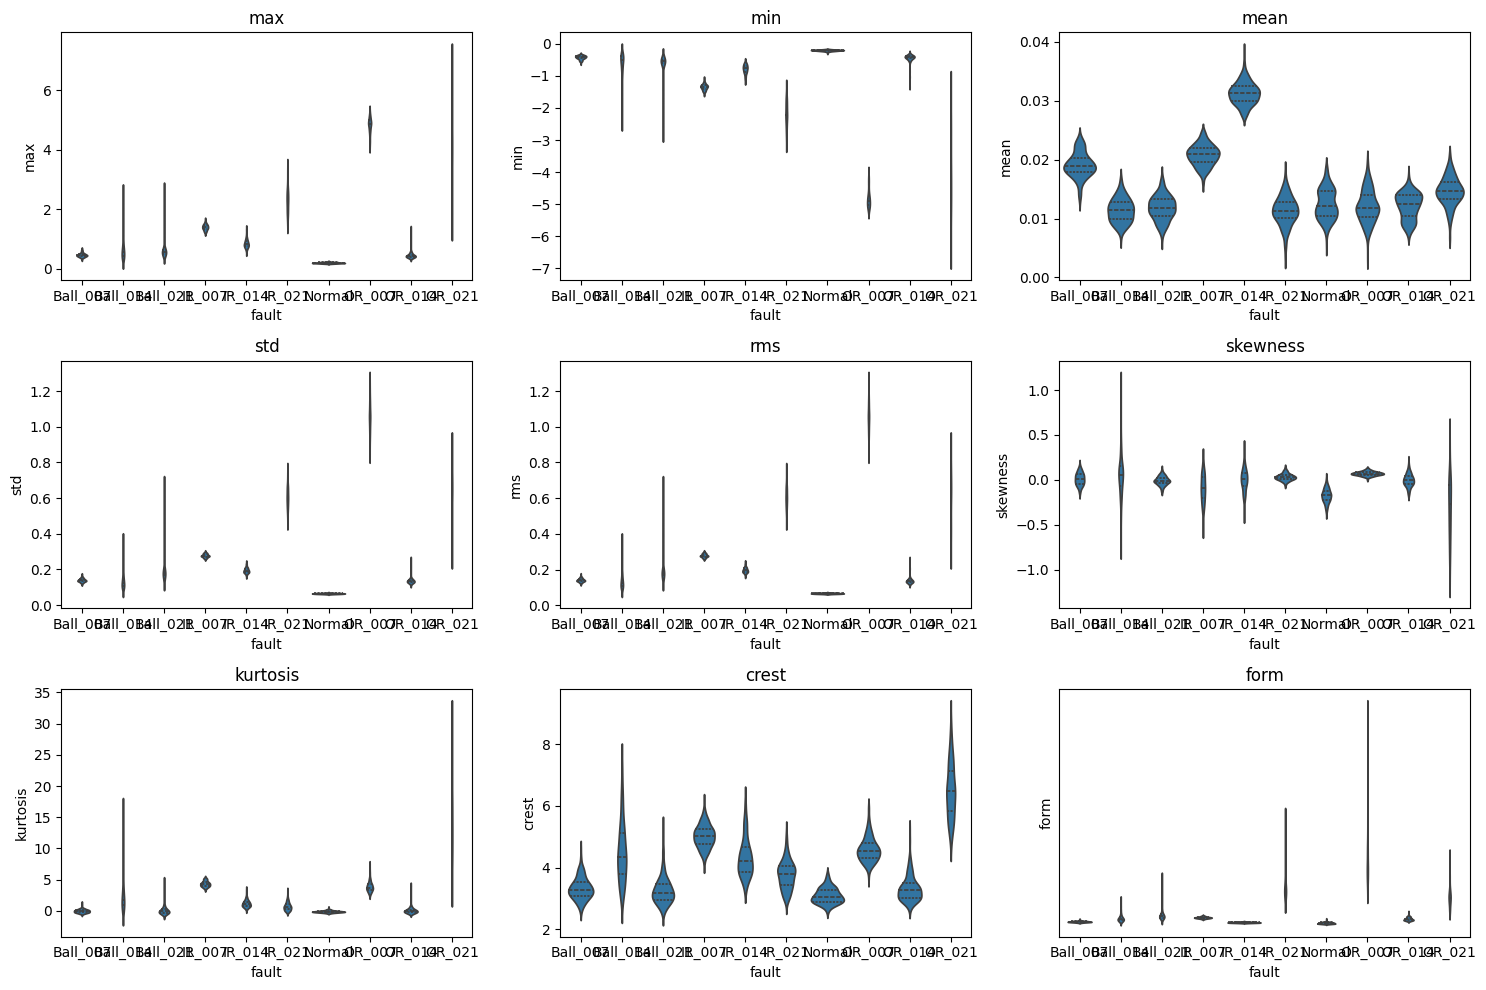

In [7]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    sns.violinplot(x=df1["fault"], y=df1[col], inner="quartile")
    # sns.violinplot(data= df, x="fault", y=f"{col}")
    plt.title(col)

plt.yticks([])
plt.tight_layout()
plt.show()

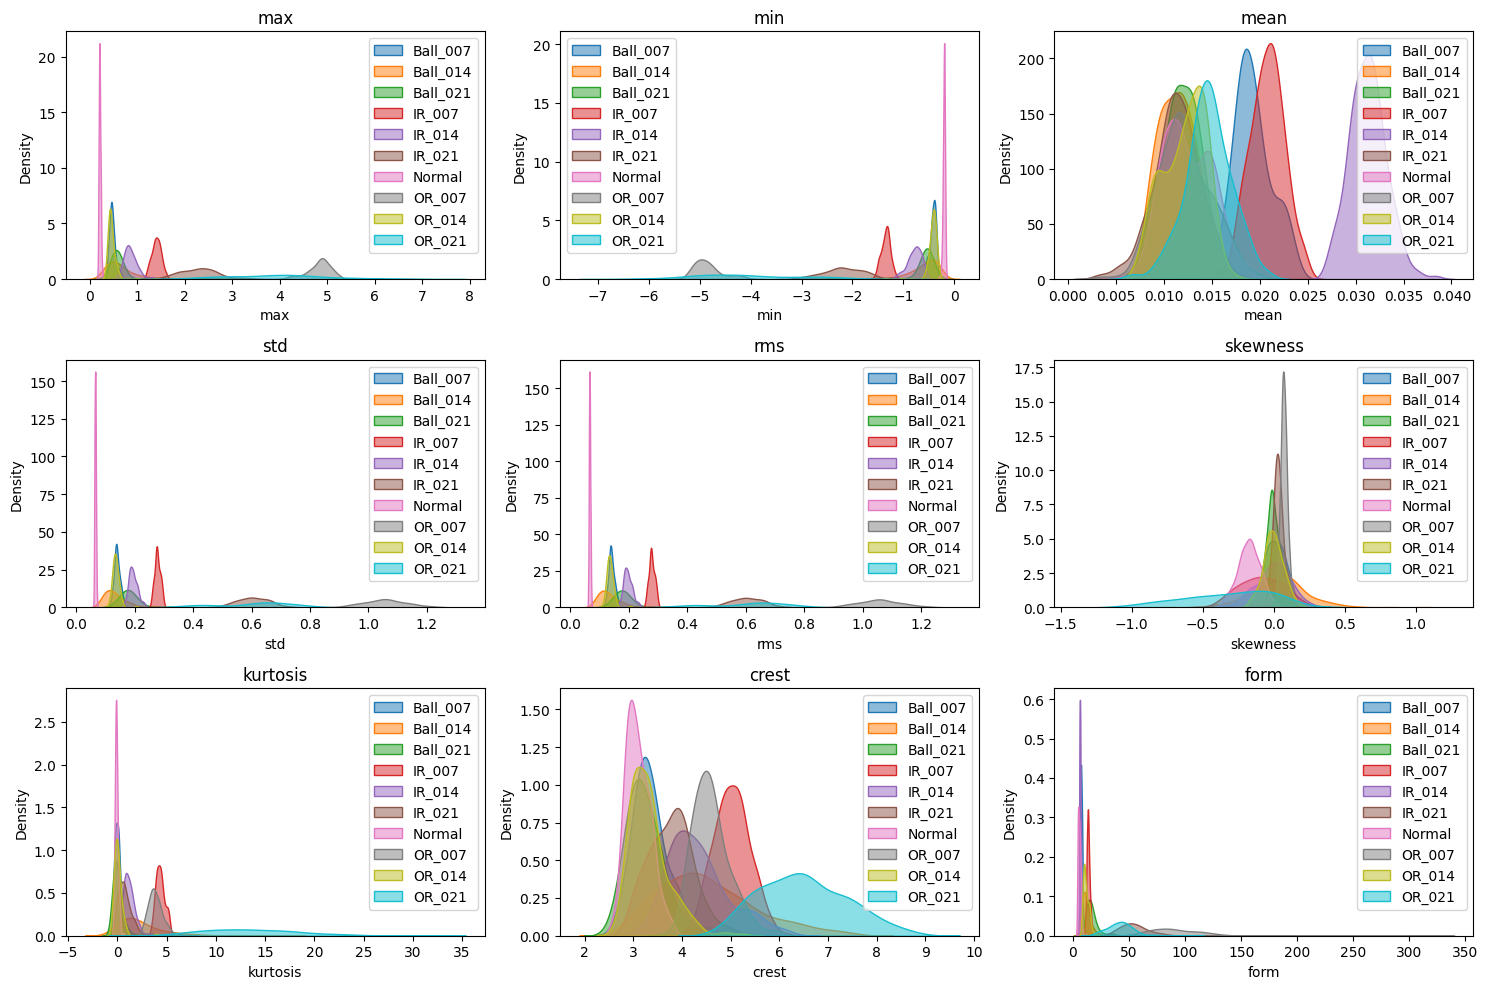

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    
    for fault_label in df1["fault"].unique():
        subset = df1[df1["fault"] == fault_label]
        sns.kdeplot(subset[col], label=f"{fault_label}", fill=True, alpha=0.5)
    
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

In [9]:
df[['form']].min(), df[['form']].max()

(form    3.484431
 dtype: float64,
 form    313.775062
 dtype: float64)

In [10]:
df[df['fault']=='Normal']

max       min      mean       std       rms  skewness  kurtosis  \
1380  0.204234 -0.198810  0.008002  0.066445  0.066925 -0.277955 -0.180225   
1381  0.204443 -0.197350  0.009596  0.062987  0.063714 -0.272366 -0.016090   
1382  0.211327 -0.180244  0.010816  0.063052  0.063972 -0.210519 -0.193607   
1383  0.200897 -0.196724  0.011418  0.064273  0.065280 -0.096584  0.106033   
1384  0.211536 -0.227808  0.012309  0.063607  0.064787 -0.225658 -0.031916   
...        ...       ...       ...       ...       ...       ...       ...   
1605  0.214248 -0.198393  0.010769  0.064084  0.064983 -0.212660 -0.116494   
1606  0.219672 -0.208824  0.013136  0.068637  0.069883 -0.061353 -0.292483   
1607  0.207990 -0.216126  0.012571  0.067112  0.068279 -0.154871 -0.068550   
1608  0.214248 -0.224053  0.012608  0.066797  0.067977 -0.327208  0.026623   
1609  0.196098 -0.247209  0.012209  0.063227  0.064395 -0.352017  0.229447   

         crest      form   fault  
1380  3.051702  8.363561  Normal  
1381  3.208751  6.639805  Normal  
1382  3.303413  5.914770  Normal  
1383  3.077483  5.717132  Normal  
1384  3.265106  5.263190  Normal  
...        ...       ...     ...  
1605  3.297007  6.034194  Normal  
1606  3.143443  5.319952  Normal  
1607  3.046158  5.431312  Normal  
1608  3.151792  5.391678  Normal  
1609  3.045222  5.274385  Normal  

[230 rows x 10 columns]

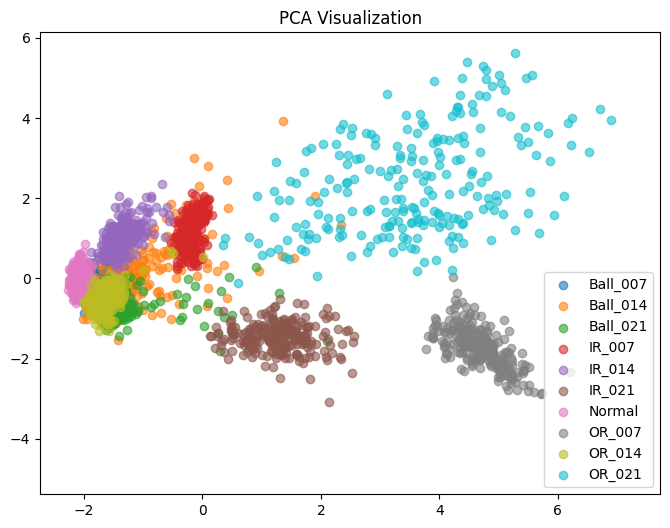

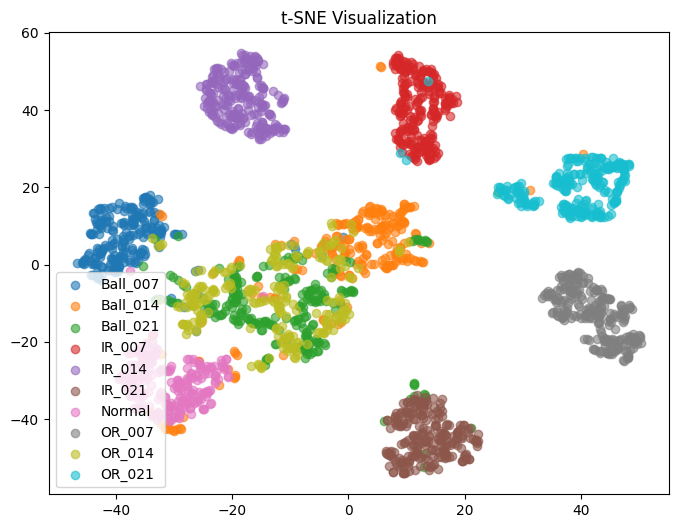

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
datas = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(datas)

# PCA 降維到 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 2D
tsne = TSNE(n_components=2, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 畫圖函數
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        idx = labels == label
        plt.scatter(embedding[idx, 0], embedding[idx, 1], label=label, alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.show()

# 視覺化 PCA
plot_embedding(pca_result, labels.values, "PCA Visualization")

# 視覺化 t-SNE
plot_embedding(tsne_result, labels.values, "t-SNE Visualization")

In [12]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
datas = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(datas)

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels.values, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels.values, "t-SNE 3D Visualization")

## Time Domain Feature `48k_DE_load1_segment4096_overlap0`

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap0.npz")
datas = read_online_data['datas']
# datas = datas.reshape(2300,2048)
labels = read_online_data['labels']

# 基本統計量
max_vals = np.max(datas, axis=1)
min_vals = np.min(datas, axis=1)
mean_vals = np.mean(datas, axis=1)
std_vals = np.std(datas, axis=1)
rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))

# 偏度與峰度
skewness_vals = skew(datas, axis=1)
kurt_vals = kurtosis(datas, axis=1)

# 波峰因子 (Crest Factor)
def crest_factor(datas):
    peak_vals = np.max(datas, axis=1)  # 計算每行的最大值
    rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))  # 計算每行的 RMS
    return peak_vals / rms_vals  # 最大值 / RMS

# 形狀因子 (Form Factor)
def form_factor(datas):
    rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))  # 計算每行的 RMS
    mean_vals = np.mean(datas, axis=1)  # 計算每行的均值
    return rms_vals / mean_vals  # RMS / 均值

crest_vals = crest_factor(datas)
form_vals = form_factor(datas)

# 創建 DataFrame
feature_names = ['max', 'min', 'mean', 'std', 'rms', 'skewness', 'kurtosis', 'crest', 'form', 'fault']
features = np.vstack([
    max_vals,
    min_vals,
    mean_vals,
    std_vals,
    rms_vals,
    skewness_vals,
    kurt_vals,
    crest_vals,
    form_vals,
    labels
    # labels[::2]
]).T  # Transpose to match columns with feature names

df = pd.DataFrame(features, columns=feature_names)

# 顯示 DataFrame
df

max                   min                  mean  \
0     0.46771569230769233   -0.4188996923076923  0.020047602313701923   
1       0.584748923076923   -0.5430258461538462  0.020715008563701922   
2     0.44685415384615385   -0.5789076923076923  0.021643285907451924   
3      0.4535298461538461   -0.4912892307692307  0.021162085186298075   
4      0.4923323076923077  -0.49087200000000003  0.019174229116586537   
...                   ...                   ...                   ...   
1145    4.599013333333334             -4.114072  0.018791819010416665   
1146             5.538848    -5.549698666666666       0.0167675078125   
1147    4.296029333333333    -4.067330666666667  0.015127110677083335   
1148    5.047229333333333    -5.287613333333333  0.014710999999999998   
1149    4.227586666666666    -3.968005333333333  0.013242793619791665   

                      std                  rms               skewness  \
0     0.12769796756828608   0.1292620488759148    0.04884889376262578   
1     0.15336654099626992  0.15475919189810597    0.00647452730074092   
2      0.1384436135456549   0.1401251795947122   -0.10670884496413026   
3       0.144373513835948  0.14591622715370214   -0.06320398676548052   
4     0.14091792689217428  0.14221643077297197  -0.019611529315789356   
...                   ...                  ...                    ...   
1145   0.5460544411705375   0.5463776946250535   -0.06203912146953711   
1146   0.7573790497288537     0.75756463373525   -0.13318100445319114   
1147   0.5219658645355404   0.5221850181858637    -0.0411108117487267   
1148   0.6756519345443924   0.6758120672010672    -0.5432287023014885   
1149   0.5439949979179173   0.5441561626431985   -0.08127087264173549   

                   kurtosis               crest                form     fault  
0      -0.03451669060699247  3.6183527676919027   6.447756038514798  Ball_007  
1      -0.04039190905987455   3.778443890182135   7.470872697068747  Ball_007  
2       0.11822141905755101  3.1889640044608827  6.4743024785560035  Ball_007  
3     -0.006669402729501339  3.1081522254280634   6.895172468551411  Ball_007  
4      -0.26355694486422143   3.461852508999085  7.4170611975189455  Ball_007  
...                     ...                 ...                 ...       ...  
1145     16.520794995806853   8.417278704046224  29.075295708317853    OR_021  
1146     17.482353883254614   7.311386716523636    45.1805147316224    OR_021  
1147      15.20516104477019   8.227025256791698   34.51981209980454    OR_021  
1148     15.890805650455885   7.468391847805944   45.93923371633929    OR_021  
1149     13.278249244672125   7.769068802109077  41.090737971627405    OR_021  

[1150 rows x 10 columns]

In [2]:
# 顯示所有欄位的資料型別
df.dtypes

max         object
min         object
mean        object
std         object
rms         object
skewness    object
kurtosis    object
crest       object
form        object
fault       object
dtype: object

In [3]:
# 強制轉換，無法轉換的值將被設為 NaN
df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric, errors='coerce')

# 檢查資料型別
print(df.dtypes)

max         float64
min         float64
mean        float64
std         float64
rms         float64
skewness    float64
kurtosis    float64
crest       float64
form        float64
fault        object
dtype: object


In [4]:
df

max       min      mean       std       rms  skewness   kurtosis  \
0     0.467716 -0.418900  0.020048  0.127698  0.129262  0.048849  -0.034517   
1     0.584749 -0.543026  0.020715  0.153367  0.154759  0.006475  -0.040392   
2     0.446854 -0.578908  0.021643  0.138444  0.140125 -0.106709   0.118221   
3     0.453530 -0.491289  0.021162  0.144374  0.145916 -0.063204  -0.006669   
4     0.492332 -0.490872  0.019174  0.140918  0.142216 -0.019612  -0.263557   
...        ...       ...       ...       ...       ...       ...        ...   
1145  4.599013 -4.114072  0.018792  0.546054  0.546378 -0.062039  16.520795   
1146  5.538848 -5.549699  0.016768  0.757379  0.757565 -0.133181  17.482354   
1147  4.296029 -4.067331  0.015127  0.521966  0.522185 -0.041111  15.205161   
1148  5.047229 -5.287613  0.014711  0.675652  0.675812 -0.543229  15.890806   
1149  4.227587 -3.968005  0.013243  0.543995  0.544156 -0.081271  13.278249   

         crest       form     fault  
0     3.618353   6.447756  Ball_007  
1     3.778444   7.470873  Ball_007  
2     3.188964   6.474302  Ball_007  
3     3.108152   6.895172  Ball_007  
4     3.461853   7.417061  Ball_007  
...        ...        ...       ...  
1145  8.417279  29.075296    OR_021  
1146  7.311387  45.180515    OR_021  
1147  8.227025  34.519812    OR_021  
1148  7.468392  45.939234    OR_021  
1149  7.769069  41.090738    OR_021  

[1150 rows x 10 columns]

In [6]:
df.to_pickle("datas/48k_DE_load1_segment4096_overlap0_TDFeature.pkl")

In [7]:
import pandas as pd
df = pd.read_pickle('datas/48k_DE_load1_segment4096_overlap0_TDFeature.pkl')

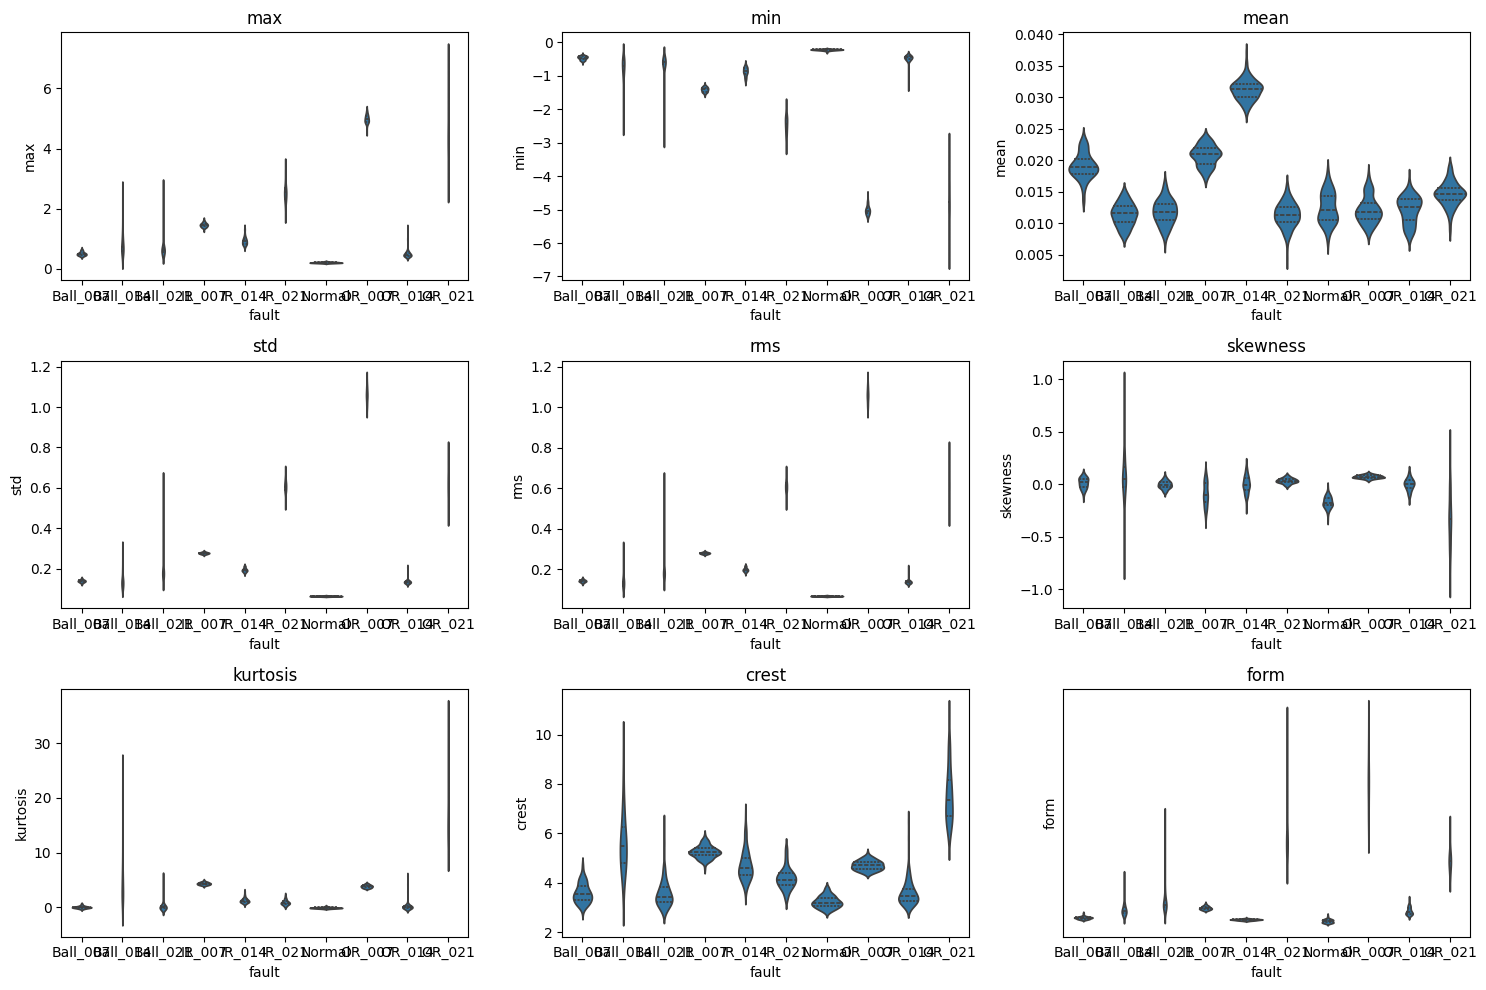

In [8]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    sns.violinplot(x=df1["fault"], y=df1[col], inner="quartile")
    # sns.violinplot(data= df, x="fault", y=f"{col}")
    plt.title(col)

plt.yticks([])
plt.tight_layout()
plt.show()

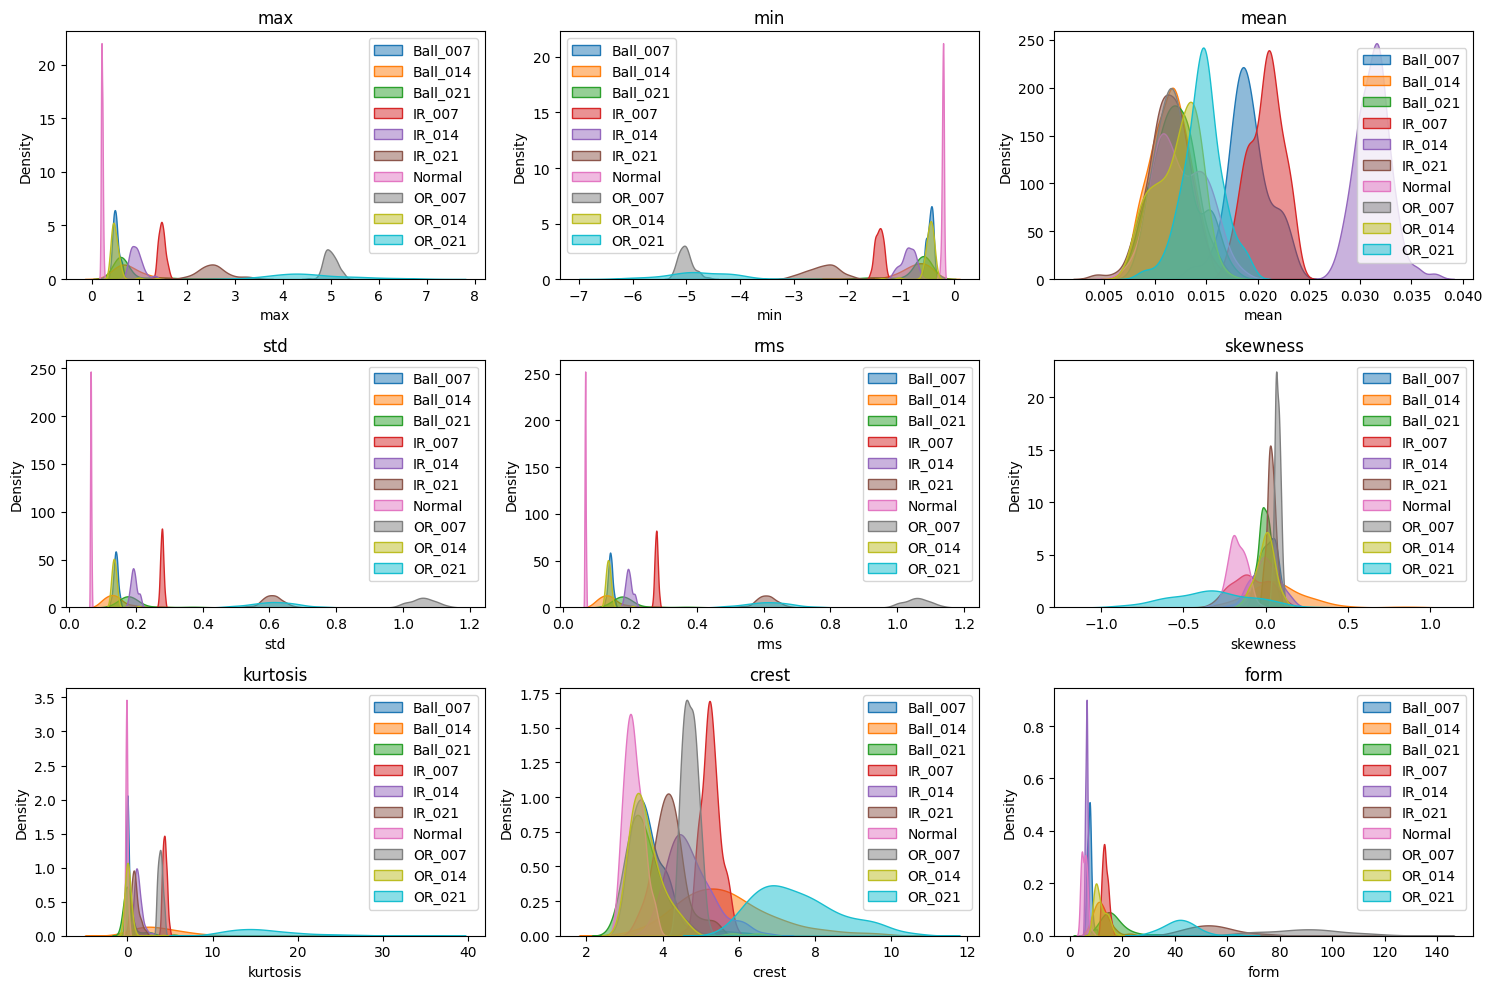

In [9]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    
    for fault_label in df1["fault"].unique():
        subset = df1[df1["fault"] == fault_label]
        sns.kdeplot(subset[col], label=f"{fault_label}", fill=True, alpha=0.5)
    
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

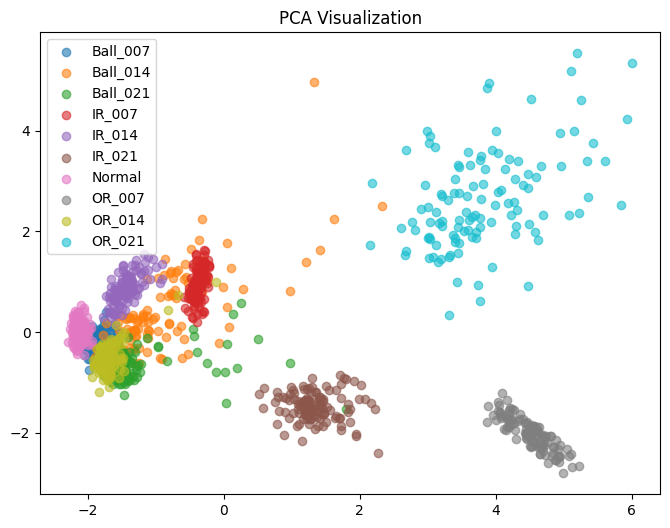

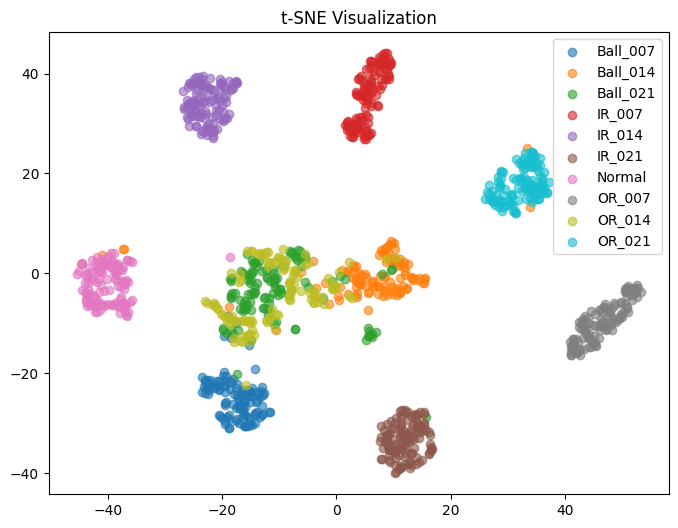

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
datas = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(datas)

# PCA 降維到 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 2D
tsne = TSNE(n_components=2, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 畫圖函數
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        idx = labels == label
        plt.scatter(embedding[idx, 0], embedding[idx, 1], label=label, alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.show()

# 視覺化 PCA
plot_embedding(pca_result, labels.values, "PCA Visualization")

# 視覺化 t-SNE
plot_embedding(tsne_result, labels.values, "t-SNE Visualization")

In [11]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
datas = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(datas)

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels.values, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels.values, "t-SNE 3D Visualization")

## Time Domain Feature `48k_DE_load1_segment4096_overlap2`

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment4096_overlap2.npz")
datas = read_online_data['datas']
# datas = datas.reshape(2300,2048)
labels = read_online_data['labels']

# 基本統計量
max_vals = np.max(datas, axis=1)
min_vals = np.min(datas, axis=1)
mean_vals = np.mean(datas, axis=1)
std_vals = np.std(datas, axis=1)
rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))

# 偏度與峰度
skewness_vals = skew(datas, axis=1)
kurt_vals = kurtosis(datas, axis=1)
# def compute_skewness(x):
#     """x should be 1D np array."""
#     N = len(x)
#     third_moment = np.sum((x - np.mean(x))**3) / N
#     s_3 = np.std(x, ddof = 1) ** 3
#     return third_moment/s_3
# def compute_kurtosis(x):
#     """x should be 1D np array."""
#     N = len(x)
#     fourth_moment = np.sum((x - np.mean(x))**4) / N
#     s_4 = np.std(x, ddof = 1) ** 4
#     return fourth_moment / s_4 - 3
# skewness_vals = [compute_skewness(data) for data in datas]
# kurt_vals = [compute_kurtosis(data) for data in datas]

# 波峰因子 (Crest Factor)
def crest_factor(datas):
    peak_vals = np.max(datas, axis=1)  # 計算每行的最大值
    rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))  # 計算每行的 RMS
    return peak_vals / rms_vals  # 最大值 / RMS

# 形狀因子 (Form Factor)
def form_factor(datas):
    rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))  # 計算每行的 RMS
    mean_vals = np.mean(datas, axis=1)  # 計算每行的均值
    return rms_vals / mean_vals  # RMS / 均值

crest_vals = crest_factor(datas)
form_vals = form_factor(datas)

# 創建 DataFrame
feature_names = ['max', 'min', 'mean', 'std', 'rms', 'skewness', 'kurtosis', 'crest', 'form', 'fault']
features = np.vstack([
    max_vals,
    min_vals,
    mean_vals,
    std_vals,
    rms_vals,
    skewness_vals,
    kurt_vals,
    crest_vals,
    form_vals,
    labels
    # labels[::2]
]).T  # Transpose to match columns with feature names

df = pd.DataFrame(features, columns=feature_names)

# 顯示 DataFrame
df

max                   min                  mean  \
0     0.46771569230769233   -0.4188996923076923  0.020047602313701923   
1     0.48941169230769227  -0.43809230769230767  0.021030783804086538   
2       0.584748923076923   -0.5789076923076923  0.022626009014423076   
3      0.4535298461538461   -0.5789076923076923  0.021476383413461538   
4      0.4923323076923077   -0.4912892307692307   0.02090564513221154   
...                   ...                   ...                   ...   
1425             5.538848    -4.836893333333333  0.017174448567708334   
1426             5.466232    -5.549698666666666  0.017929846354166667   
1427    4.296029333333333    -4.067330666666667  0.015717449869791667   
1428    3.965501333333333    -4.726717333333333  0.014771929036458332   
1429    5.047229333333333    -5.287613333333333  0.013536231119791667   

                      std                  rms               skewness  \
0     0.12769796756828608   0.1292620488759148    0.04884889376262578   
1      0.1470232521190001  0.14851979844809007   0.046788368802895566   
2     0.14278990934823074   0.1445714165926194   -0.07054262807610977   
3      0.1431826704021779  0.14478436430782404   -0.16598058183697753   
4      0.1476760599645876  0.14914846524540046  -0.016115017846299654   
...                   ...                  ...                    ...   
1425   0.6288483407764102   0.6290828223539798     0.0760967247802884   
1426   0.5526783064516505   0.5529690676815011    -0.5471042626315474   
1427    0.522083526273706   0.5223200614917991  -0.043932608517275255   
1428   0.5187518068173773   0.5189620862488431    -0.4494305907607585   
1429   0.6390021413668533    0.639145496913146   -0.31728619023114657   

                  kurtosis               crest                form     fault  
0     -0.03451669060699247  3.6183527676919027   6.447756038514798  Ball_007  
1     -0.12497340400310497  3.2952622978326294  7.0620191730196415  Ball_007  
2      0.41038318648405125  4.0447063247962625   6.389611906388862  Ball_007  
3      0.17734552119896385  3.1324504432647338  6.7415617201671045  Ball_007  
4     -0.06958040716055125  3.3009545682032457   7.134363197220431  Ball_007  
...                    ...                 ...                 ...       ...  
1425     22.64443363998562   8.804640348108782  36.628996842250366    OR_021  
1426     29.18222157316393   9.885240096555343  30.840703080146483    OR_021  
1427    15.189148821627267   8.224898199512838  33.231857955257624    OR_021  
1428    18.814159106899343   7.641215877631318   35.13163954199902    OR_021  
1429    17.702539804985385    7.89683938588275   47.21738948285503    OR_021  

[1430 rows x 10 columns]

In [13]:
# 顯示所有欄位的資料型別
df.dtypes

max         object
min         object
mean        object
std         object
rms         object
skewness    object
kurtosis    object
crest       object
form        object
fault       object
dtype: object

In [14]:
# 強制轉換，無法轉換的值將被設為 NaN
df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric, errors='coerce')

# 檢查資料型別
print(df.dtypes)

max         float64
min         float64
mean        float64
std         float64
rms         float64
skewness    float64
kurtosis    float64
crest       float64
form        float64
fault        object
dtype: object


In [15]:
df

max       min      mean       std       rms  skewness   kurtosis  \
0     0.467716 -0.418900  0.020048  0.127698  0.129262  0.048849  -0.034517   
1     0.489412 -0.438092  0.021031  0.147023  0.148520  0.046788  -0.124973   
2     0.584749 -0.578908  0.022626  0.142790  0.144571 -0.070543   0.410383   
3     0.453530 -0.578908  0.021476  0.143183  0.144784 -0.165981   0.177346   
4     0.492332 -0.491289  0.020906  0.147676  0.149148 -0.016115  -0.069580   
...        ...       ...       ...       ...       ...       ...        ...   
1425  5.538848 -4.836893  0.017174  0.628848  0.629083  0.076097  22.644434   
1426  5.466232 -5.549699  0.017930  0.552678  0.552969 -0.547104  29.182222   
1427  4.296029 -4.067331  0.015717  0.522084  0.522320 -0.043933  15.189149   
1428  3.965501 -4.726717  0.014772  0.518752  0.518962 -0.449431  18.814159   
1429  5.047229 -5.287613  0.013536  0.639002  0.639145 -0.317286  17.702540   

         crest       form     fault  
0     3.618353   6.447756  Ball_007  
1     3.295262   7.062019  Ball_007  
2     4.044706   6.389612  Ball_007  
3     3.132450   6.741562  Ball_007  
4     3.300955   7.134363  Ball_007  
...        ...        ...       ...  
1425  8.804640  36.628997    OR_021  
1426  9.885240  30.840703    OR_021  
1427  8.224898  33.231858    OR_021  
1428  7.641216  35.131640    OR_021  
1429  7.896839  47.217389    OR_021  

[1430 rows x 10 columns]

In [16]:
df.to_pickle("datas/48k_DE_load1_segment4096_overlap2_TDFeature.pkl")

In [ ]:
import pandas as pd
df = pd.read_pickle('datas/48k_DE_load1_segment4096_overlap2_TDFeature.pkl')

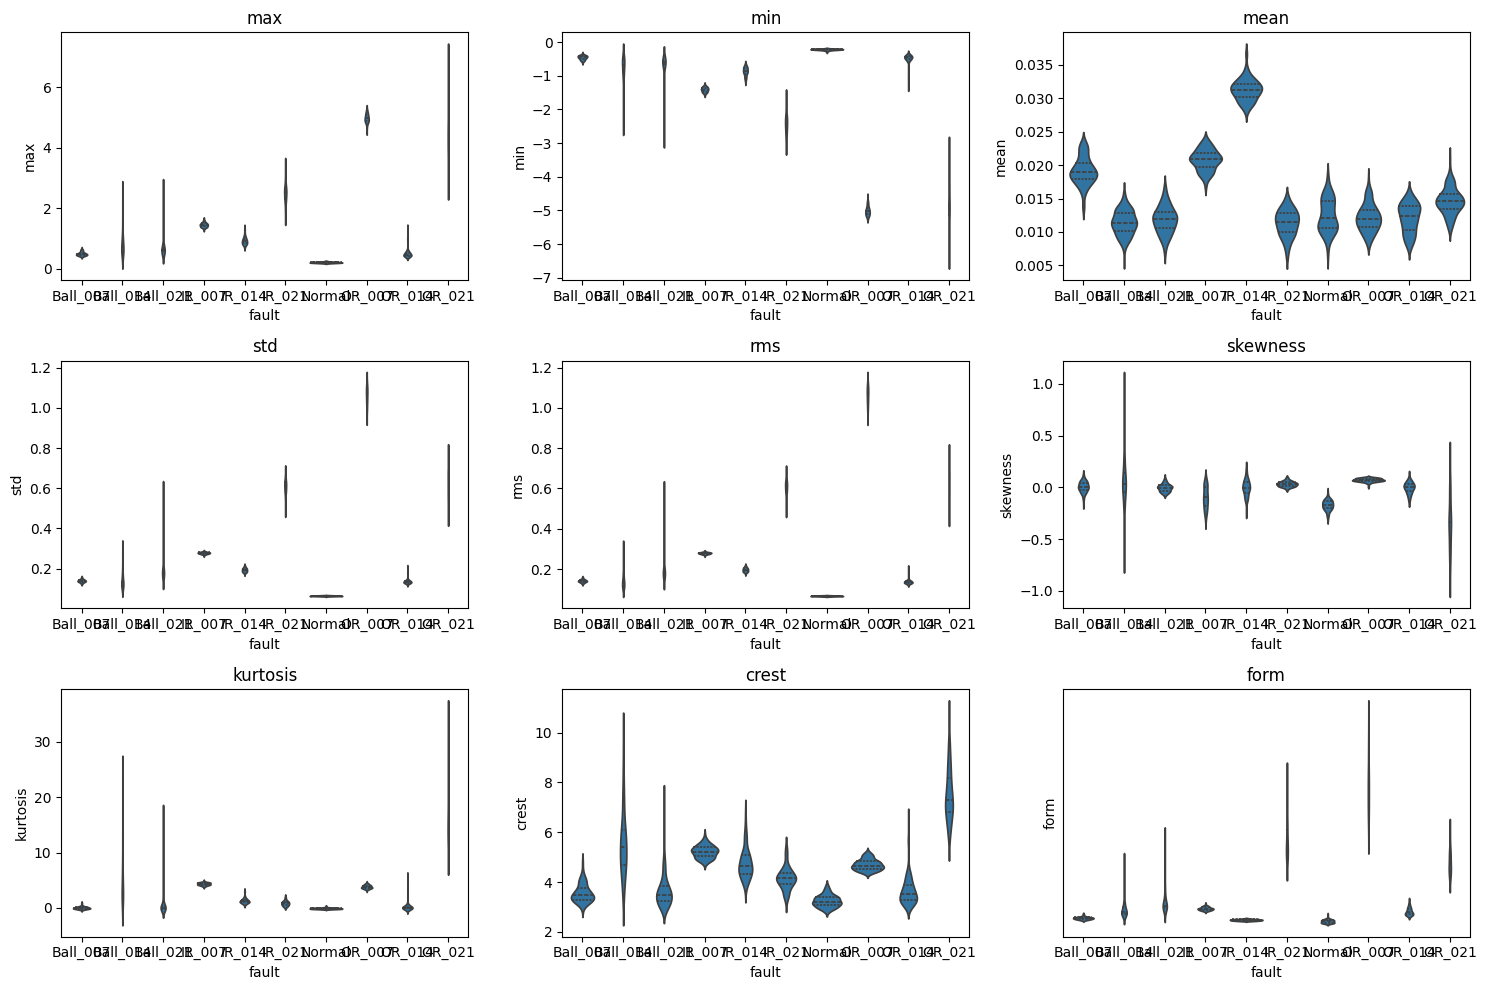

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    sns.violinplot(x=df1["fault"], y=df1[col], inner="quartile")
    # sns.violinplot(data= df, x="fault", y=f"{col}")
    plt.title(col)

plt.yticks([])
plt.tight_layout()
plt.show()

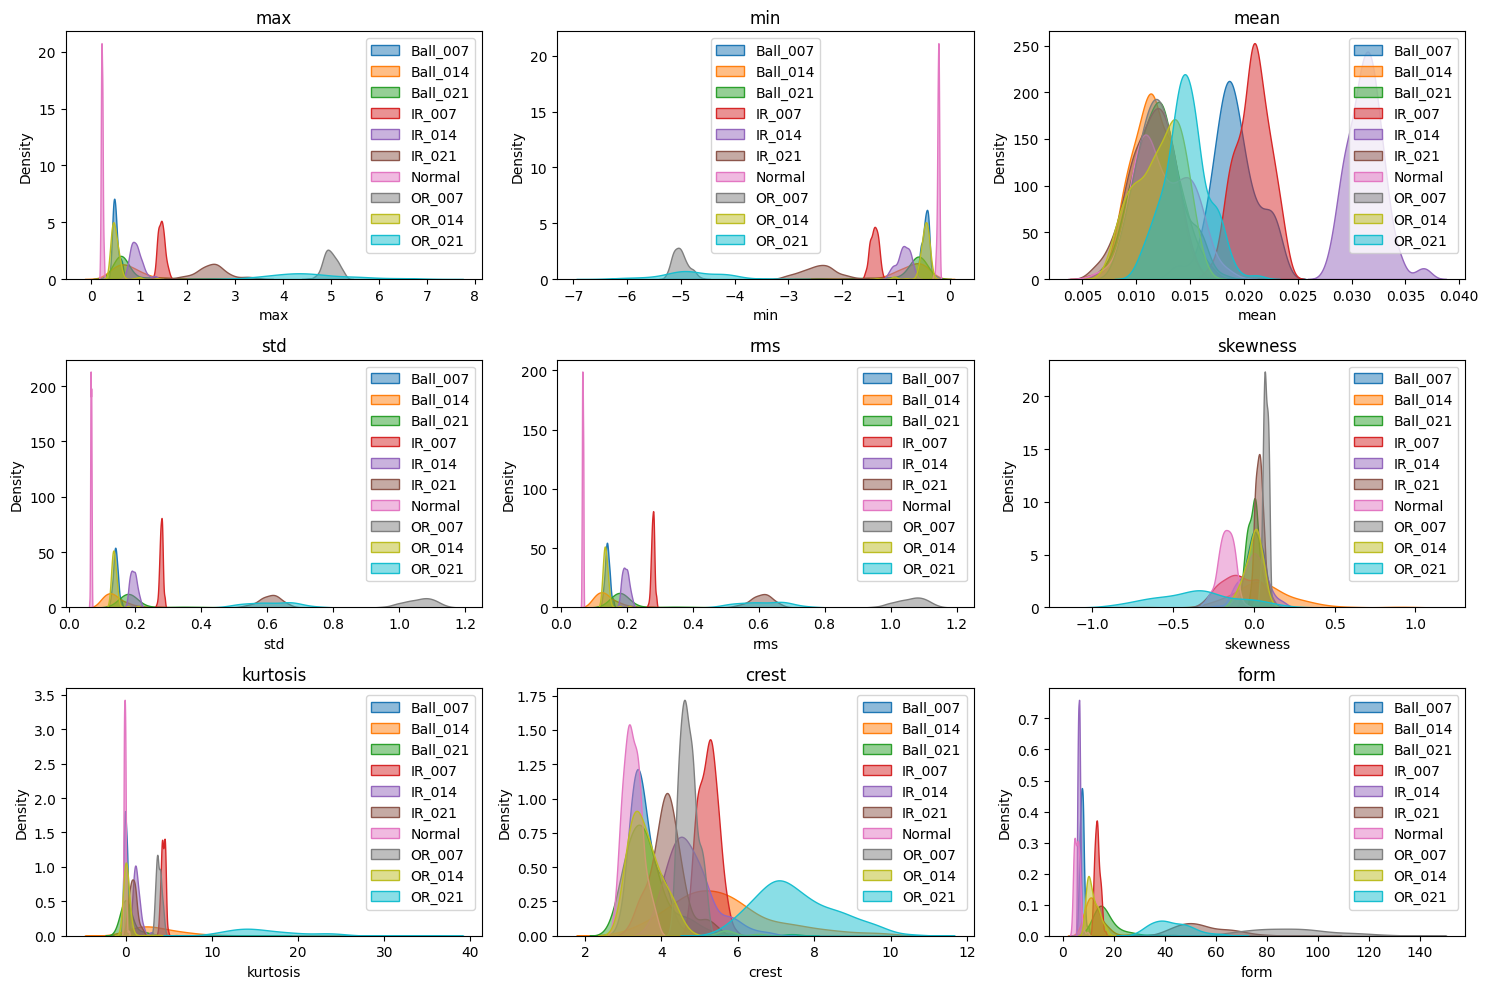

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    
    for fault_label in df1["fault"].unique():
        subset = df1[df1["fault"] == fault_label]
        sns.kdeplot(subset[col], label=f"{fault_label}", fill=True, alpha=0.5)
    
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

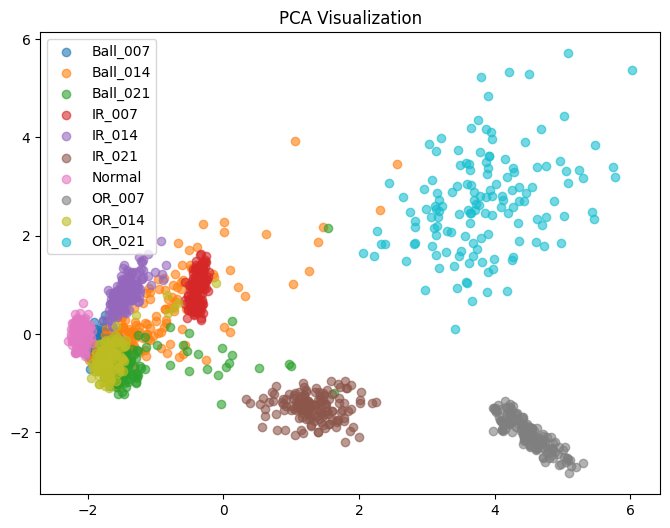

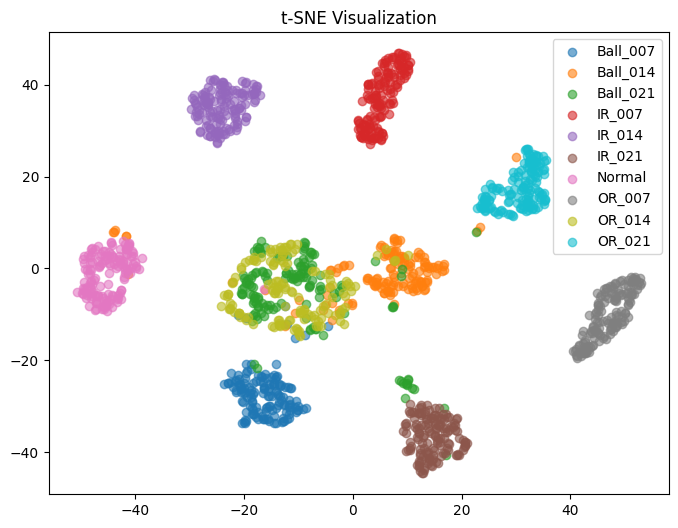

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
datas = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(datas)

# PCA 降維到 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 2D
tsne = TSNE(n_components=2, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 畫圖函數
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        idx = labels == label
        plt.scatter(embedding[idx, 0], embedding[idx, 1], label=label, alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.show()

# 視覺化 PCA
plot_embedding(pca_result, labels.values, "PCA Visualization")

# 視覺化 t-SNE
plot_embedding(tsne_result, labels.values, "t-SNE Visualization")

In [ ]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
datas = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(datas)

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels.values, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels.values, "t-SNE 3D Visualization")

## Time Domain Feature `48k_DE_load1_segment16384_overlap5`

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# 讀取資料
read_online_data = np.load("datas/48k_DE_load1_segment16384_overlap5.npz")
datas = read_online_data['datas']
# datas = datas.reshape(2300,2048)
labels = read_online_data['labels']

# 基本統計量
max_vals = np.max(datas, axis=1)
min_vals = np.min(datas, axis=1)
mean_vals = np.mean(datas, axis=1)
std_vals = np.std(datas, axis=1)
rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))

# 偏度與峰度
skewness_vals = skew(datas, axis=1)
kurt_vals = kurtosis(datas, axis=1)

# 波峰因子 (Crest Factor)
def crest_factor(datas):
    peak_vals = np.max(datas, axis=1)  # 計算每行的最大值
    rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))  # 計算每行的 RMS
    return peak_vals / rms_vals  # 最大值 / RMS

# 形狀因子 (Form Factor)
def form_factor(datas):
    rms_vals = np.sqrt(np.mean(np.square(datas), axis=1))  # 計算每行的 RMS
    mean_vals = np.mean(datas, axis=1)  # 計算每行的均值
    return rms_vals / mean_vals  # RMS / 均值

crest_vals = crest_factor(datas)
form_vals = form_factor(datas)

# 創建 DataFrame
feature_names = ['max', 'min', 'mean', 'std', 'rms', 'skewness', 'kurtosis', 'crest', 'form', 'fault']
features = np.vstack([
    max_vals,
    min_vals,
    mean_vals,
    std_vals,
    rms_vals,
    skewness_vals,
    kurt_vals,
    crest_vals,
    form_vals,
    labels
    # labels[::2]
]).T  # Transpose to match columns with feature names

df = pd.DataFrame(features, columns=feature_names)

# 顯示 DataFrame
df

max                  min                  mean  \
0      0.584748923076923  -0.5789076923076923  0.020891995492788463   
1     0.4923323076923077  -0.5789076923076923   0.01991949688251202   
2      0.663396923076923  -0.5131938461538461  0.018037285456730768   
3      0.663396923076923            -0.553248  0.017902189678485576   
4    0.49629599999999996            -0.553248   0.01866316980919471   
..                   ...                  ...                   ...   
555             4.672464            -4.792656  0.015255285807291668   
556    5.675733333333333   -5.539682666666667  0.016295307779947917   
557    6.366837333333334  -5.8526826666666665   0.01703909033203125   
558    6.366837333333334  -5.8526826666666665   0.01746396337890625   
559             5.538848   -5.549698666666666        0.016349359375   

                     std                  rms               skewness  \
0    0.14127968197611834  0.14281604957057115  -0.030318332595309725   
1    0.13888748612470314  0.14030866031037434   -0.04831798254834553   
2     0.1367373149047818   0.1379218508939648   0.020714828474872958   
3    0.14022209264829502  0.14136026196195134    0.03910390581407132   
4    0.13985908126687888  0.14109881828045998  -0.011309857455270597   
..                   ...                  ...                    ...   
555   0.6031496282366333   0.6033425211163649   -0.32224786642173386   
556   0.6048909666686477    0.605110418529523   -0.39817052035455336   
557   0.6577369088441976   0.6579575760299925     -0.171161261571231   
558   0.6716484743467227   0.6718754818485194    -0.0650861873045102   
559   0.6326062552359625   0.6328174900519427   -0.23867929889845985   

                 kurtosis              crest                form     fault  
0    0.056407616502386126  4.094420233826557   6.835921902236129  Ball_007  
1     -0.0367112280111499  3.508923159862178   7.043785349496248  Ball_007  
2     0.13524992444111428  4.809947943541932   7.646486009484208  Ball_007  
3     0.23750902559459108  4.692951992798963  7.8962554023117475  Ball_007  
4    0.032926283697249925  3.517364681350626   7.560281545043081  Ball_007  
..                    ...                ...                 ...       ...  
555    14.628201467508337  7.744297536587572   39.54973566132608    OR_021  
556    15.868576447393636  9.379665528030264   37.13402819394044    OR_021  
557    19.921823483620702  9.676668474204341   38.61459521657202    OR_021  
558     20.72558290178923  9.476216211695005   38.47210780687049    OR_021  
559    18.486119229974513  8.752678437420183   38.70595021720492    OR_021  

[560 rows x 10 columns]

In [27]:
# 顯示所有欄位的資料型別
df.dtypes

max         object
min         object
mean        object
std         object
rms         object
skewness    object
kurtosis    object
crest       object
form        object
fault       object
dtype: object

In [28]:
# 強制轉換，無法轉換的值將被設為 NaN
df[df.columns[:-1]] = df[df.columns[:-1]].apply(pd.to_numeric, errors='coerce')

# 檢查資料型別
print(df.dtypes)

max         float64
min         float64
mean        float64
std         float64
rms         float64
skewness    float64
kurtosis    float64
crest       float64
form        float64
fault        object
dtype: object


In [29]:
df

max       min      mean       std       rms  skewness   kurtosis  \
0    0.584749 -0.578908  0.020892  0.141280  0.142816 -0.030318   0.056408   
1    0.492332 -0.578908  0.019919  0.138887  0.140309 -0.048318  -0.036711   
2    0.663397 -0.513194  0.018037  0.136737  0.137922  0.020715   0.135250   
3    0.663397 -0.553248  0.017902  0.140222  0.141360  0.039104   0.237509   
4    0.496296 -0.553248  0.018663  0.139859  0.141099 -0.011310   0.032926   
..        ...       ...       ...       ...       ...       ...        ...   
555  4.672464 -4.792656  0.015255  0.603150  0.603343 -0.322248  14.628201   
556  5.675733 -5.539683  0.016295  0.604891  0.605110 -0.398171  15.868576   
557  6.366837 -5.852683  0.017039  0.657737  0.657958 -0.171161  19.921823   
558  6.366837 -5.852683  0.017464  0.671648  0.671875 -0.065086  20.725583   
559  5.538848 -5.549699  0.016349  0.632606  0.632817 -0.238679  18.486119   

        crest       form     fault  
0    4.094420   6.835922  Ball_007  
1    3.508923   7.043785  Ball_007  
2    4.809948   7.646486  Ball_007  
3    4.692952   7.896255  Ball_007  
4    3.517365   7.560282  Ball_007  
..        ...        ...       ...  
555  7.744298  39.549736    OR_021  
556  9.379666  37.134028    OR_021  
557  9.676668  38.614595    OR_021  
558  9.476216  38.472108    OR_021  
559  8.752678  38.705950    OR_021  

[560 rows x 10 columns]

In [30]:
df.to_pickle("datas/48k_DE_load1_segment16384_overlap5_TDFeature.pkl")

In [31]:
import pandas as pd
df = pd.read_pickle('datas/48k_DE_load1_segment16384_overlap5_TDFeature.pkl')

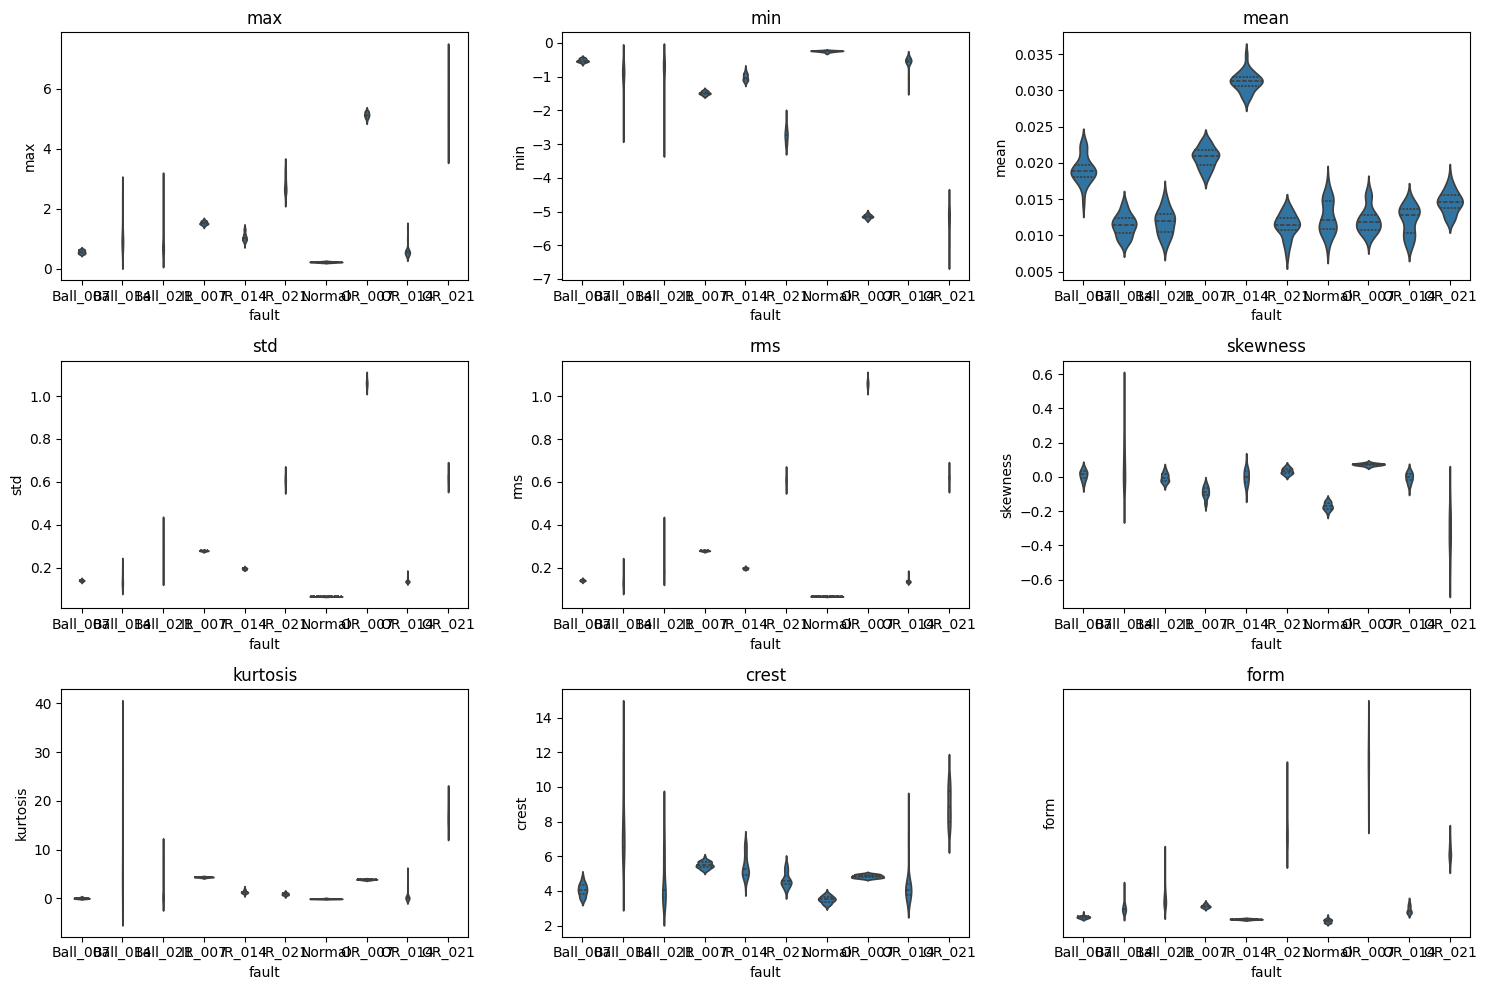

In [32]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    sns.violinplot(x=df1["fault"], y=df1[col], inner="quartile")
    # sns.violinplot(data= df, x="fault", y=f"{col}")
    plt.title(col)

plt.yticks([])
plt.tight_layout()
plt.show()

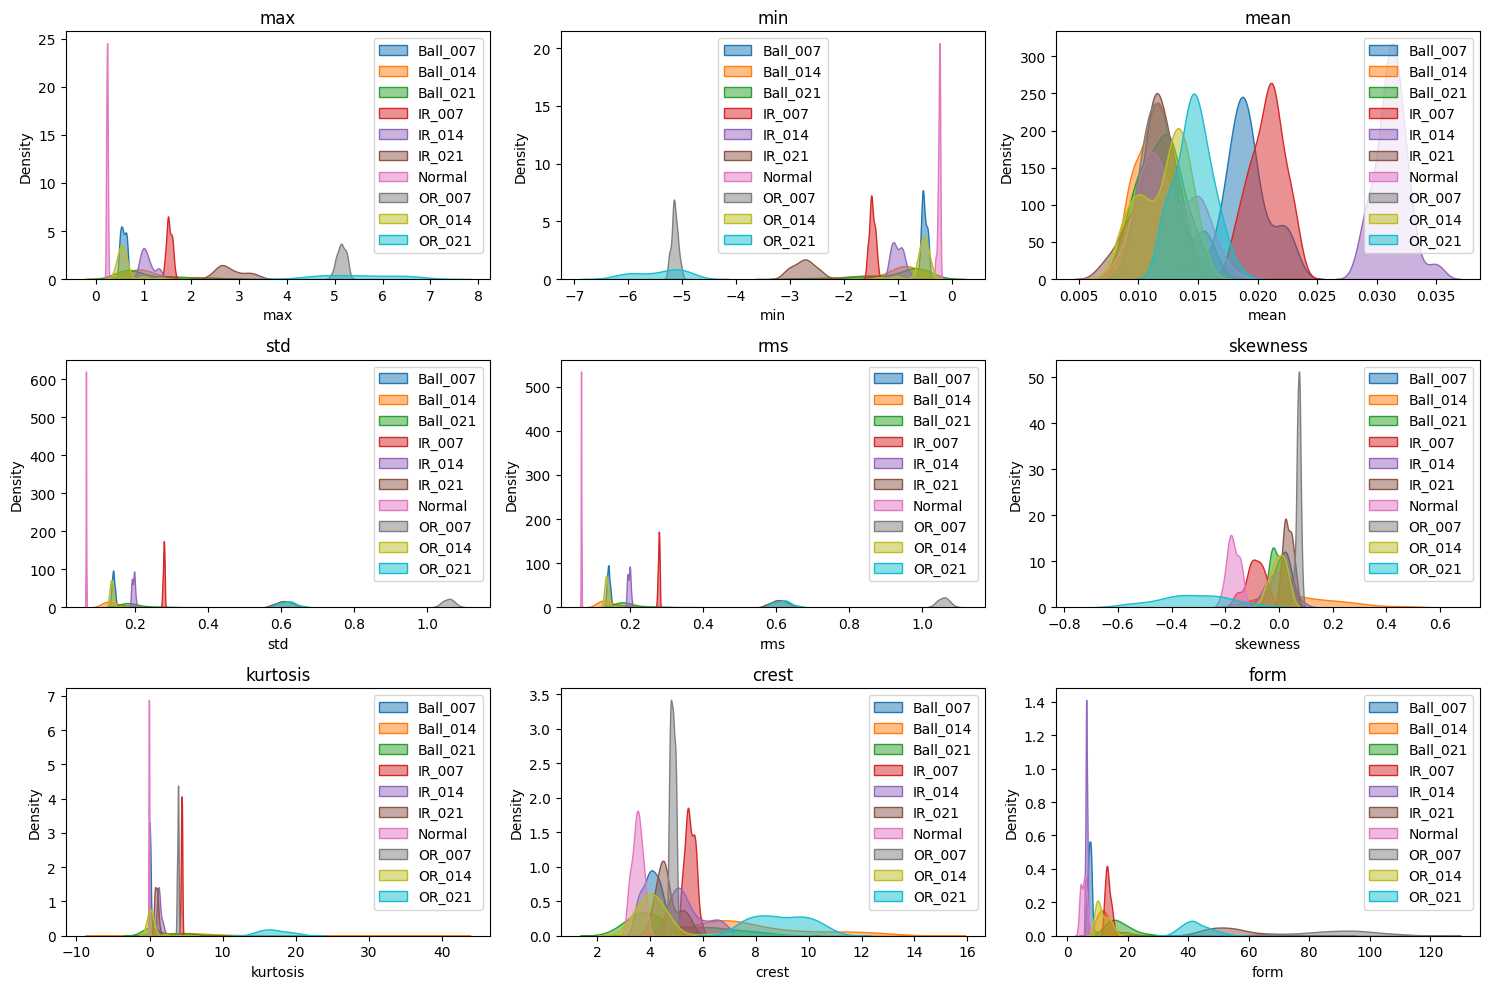

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# df1 = df.sample(n=10000, random_state=42)  # 固定隨機種子，確保結果一致
df1 = df
# 設定畫布大小
plt.figure(figsize=(15, 10))

# 依據變數數量來畫子圖
for i, col in enumerate(df1.columns[:-1], 1):  # 忽略最後一列 'fault'
    plt.subplot(3, 3, i)  # 3x3 的子圖
    
    for fault_label in df1["fault"].unique():
        subset = df1[df1["fault"] == fault_label]
        sns.kdeplot(subset[col], label=f"{fault_label}", fill=True, alpha=0.5)
    
    plt.title(col)
    plt.legend()

plt.tight_layout()
plt.show()

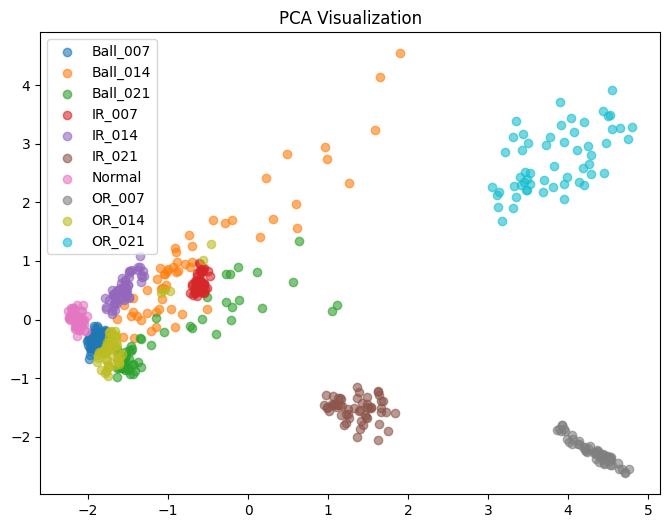

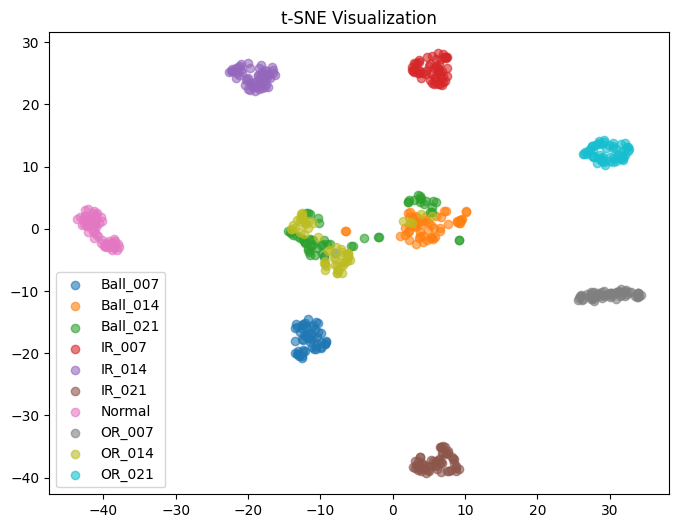

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
datas = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(datas)

# PCA 降維到 2D
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 2D
tsne = TSNE(n_components=2, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 畫圖函數
def plot_embedding(embedding, labels, title):
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(labels)
    for label in unique_labels:
        idx = labels == label
        plt.scatter(embedding[idx, 0], embedding[idx, 1], label=label, alpha=0.6)
    plt.legend()
    plt.title(title)
    plt.show()

# 視覺化 PCA
plot_embedding(pca_result, labels.values, "PCA Visualization")

# 視覺化 t-SNE
plot_embedding(tsne_result, labels.values, "t-SNE Visualization")

In [36]:
import plotly.io as pio
pio.renderers.default = "vscode+iframe"
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
SEED = 42

# 假設 data 已經讀取成 pandas DataFrame
# 取出特徵與標籤
datas = df.iloc[:, :-1]
labels = df.iloc[:, -1]

# 標準化數據
scaler = StandardScaler()
datas_scaled = scaler.fit_transform(datas)

# PCA 降維到 3D
pca = PCA(n_components=3)
pca_result = pca.fit_transform(datas_scaled)

# t-SNE 降維到 3D
tsne = TSNE(n_components=3, random_state=SEED)
tsne_result = tsne.fit_transform(datas_scaled)

# 3D 視覺化函數
def plot_3d_embedding(embedding, labels, title):
    # 使用 Plotly Express 進行 3D 散點圖繪製
    df = pd.DataFrame(embedding, columns=['Dim 1', 'Dim 2', 'Dim 3'])
    df['Label'] = labels
    fig = px.scatter_3d(df, x='Dim 1', y='Dim 2', z='Dim 3', color='Label', title=title)
    
    # 設定 marker 大小，調整點的大小
    fig.update_traces(marker=dict(size=3))  # 將點的大小設為 3
    fig.show()

# 視覺化 PCA
plot_3d_embedding(pca_result, labels.values, "PCA 3D Visualization")

# 視覺化 t-SNE
plot_3d_embedding(tsne_result, labels.values, "t-SNE 3D Visualization")